# Data Collection

## 2000~2020 영화 데이터 수집 후 애니메이션 추출 

In [ ]:
import pandas as pd
import requests
import json
import datetime
import csv

curPage     = 1
itemPerPage = 100
openStartDt = 2000
openEndDt   = 2020

url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieList.json?' \
      'key=a55ecee3a62956d29100b96ce6dc3b05&' \
      'curPage={}&itemPerPage={}&openStartDt={}&openEndDt={}' \
      .format(curPage, itemPerPage, openStartDt, openEndDt)
req = requests.get(url)
data = req.text
json_data = json.loads(data)
total_count = int(json_data['movieListResult']['totCnt'])
rows = []

for page in range(1, total_count):
      url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieList.json?' \
            'key=a55ecee3a62956d29100b96ce6dc3b05&' \
            'curPage={}&itemPerPage={}&openStartDt={}&openEndDt={}' \
            .format(page, itemPerPage, openStartDt, openEndDt)
      req = requests.get(url)
      data = req.text
      json_data = json.loads(data)
      movieList = json_data['movieListResult']['movieList']
      for movie in movieList:
            movieCd = movie['movieCd']
            movieNm = movie['movieNm']
            prdtYear = movie['prdtYear']
            openDt = movie['openDt']
            maker = []
            for company in movie['companys']:
                maker.append(company['companyNm'])
            nationAlt = movie['nationAlt']
            repNationNm = movie['repNationNm']
            repGenreNm = movie['repGenreNm']
            peopleNm = movie['directors']
            repPeopleNm = []
            for director in movie['directors']:
                  repPeopleNm.append(director['peopleNm'])
            t = (movieCd, movieNm, prdtYear, openDt, maker, nationAlt, repNationNm, repGenreNm, repPeopleNm)
            if repGenreNm.find('애니메이션') != -1:
                rows.append(t)
            else:
                filename = "{}.csv".format('영화목록')
                f = open(filename, "w", encoding="utf-8", newline='')
                writer = csv.writer(f, quoting=csv.QUOTE_ALL, delimiter=',')
                writer.writerows(rows)
                f.close()

In [5]:
df = pd.read_csv('영화목록.csv')
df.columns = ['movieCd', 'movieNm', 'prdtYear', 'openDt', 'maker', 'nationAlt', 'repNationNm', 'repGenreNm', 'repPeopleNm']
df.to_csv('영화목록.csv')

In [7]:
from ast import literal_eval

df = pd.read_csv('영화목록.csv')
df.repPeopleNm = df.repPeopleNm.apply(literal_eval)
df.maker = df.maker.apply(literal_eval)
rows = []

for i in range(len(df)):
      name_list= df['repPeopleNm'][i]
      if len(name_list) == 0:
            repPeopleNm = '알수없음'
      else:
            repPeopleNm = name_list[0]
      maker_list = df['maker'][i]
      if len(maker_list) == 0:
             maker = '알수없음'
      else:
             maker = maker_list[0]
      t = (repPeopleNm, maker)
      rows.append(t)
df1 = pd.DataFrame(data=rows, columns=['repPeopleNm', 'maker'])
df = pd.concat([df, df1], axis=1, ignore_index=True)
df.to_csv('영화목록.csv')

In [8]:
df = pd.read_csv('영화목록.csv')
df.columns = ['delete1', 'delete2', 'movieCd', 'movieNm', 'prdtYear', 'openDt', 'delete3', 'nationAlt', 'repNationNm', 'repGenreNm', 'delete4', 'repPeopleNm', 'maker']
df = df.drop(['delete1', 'delete2', 'delete3', 'delete4'], axis=1)
df.to_csv('영화목록.csv')

In [11]:
df = pd.read_csv('영화목록.csv')
rows = []

for movieCode in df['movieCd']:
      url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json?' \
             'key=f48a15020164724852370b3ac676ea4d&movieCd={}'.format(movieCode)
      req = requests.get(url)
      data = req.text
      json_data = json.loads(data)
      movieInfo = json_data['movieInfoResult']['movieInfo']
      movieCd = movieInfo['movieCd']
      showTm = movieInfo['showTm']
      typeNm = movieInfo['typeNm']
      dist = []
      for company in movieInfo['companys']:
          if company['companyPartNm'] == "배급사":
             dist.append(company['companyNm'])
      agency = []
      for company in movieInfo['companys']:
            if company['companyPartNm'] == "수입사":
                  agency.append(company['companyNm'])
      actorNum = len(movieInfo['actors'])
      watchGradeNm = []
      for audits in movieInfo['audits']:
            watchGradeNm.append(audits['watchGradeNm'])
      t = (movieCd, showTm, typeNm, dist, agency, actorNum, watchGradeNm)
      rows.append(t)

df = pd.DataFrame(data=rows, columns=['movieCd', 'showTm', 'typeNm', 'dist', 'agency', 'actorNum','watchGradeNm'])
df.to_csv('영화정보.csv')

In [22]:
df = pd.read_csv('영화정보.csv')
df.dist = df.dist.apply(literal_eval)
df.agency = df.agency.apply(literal_eval)
df.watchGradeNm = df.watchGradeNm.apply(literal_eval)
rows = []

for i in range(len(df)):
    dist_list = df['dist'][i]
    if len(dist_list) == 0:
        dist = '알수없음'
    else:
        dist = dist_list[0]
    agency_list = df['agency'][i]
    if len(agency_list) == 0:
        agency = '알수없음'
    else:
        agency = agency_list[0]
    grade_list = df['watchGradeNm'][i]
    if len(grade_list) == 0:
       watchGradeNm = '알수없음'
    else:
       watchGradeNm = grade_list[0]
    t = (dist, agency, watchGradeNm)
    rows.append(t)
df1 = pd.DataFrame(data=rows, columns=['dist', 'agency', 'watchGradeNm'])
df = pd.concat([df, df1], axis=1, ignore_index=True)
df.columns = ['d1','movieCd', 'showTm', 'typeNm', 'd2', 'd3', 'actorNum','d4', 'dist', 'agency', 'watchGradeNm']
df = df.drop(['d1', 'd2', 'd3', 'd4'], axis=1)
df.to_csv('영화정보.csv')

In [29]:
df = pd.read_csv('영화목록.csv', index_col=0)
df1 = pd.read_csv('영화정보.csv', index_col=0)
df = pd.merge(df, df1, how='left', left_on='movieCd', right_on='movieCd')
df.to_csv('영화목록정보.csv')

In [3]:
import pandas as pd
import requests
import json
import datetime
import csv


df = pd.read_csv('영화목록정보.csv', index_col=0)
rows = []

for peopleNm in df['repPeopleNm']:
    url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/people/searchPeopleList.json?' \
           'key=23cc6c061ce07629fa1c21f1e235714e&peopleNm={}'.format(peopleNm)
    req = requests.get(url)
    data = req.text
    json_data = json.loads(data)
    peopleList = json_data['peopleListResult']['peopleList']
    for plist in peopleList:
        peopleNm = plist['peopleNm']
        peopleCd = plist['peopleCd']
        if plist['repRoleNm'] != '감독':
            continue
    t = (peopleNm, peopleCd)
    rows.append(t)
df = pd.DataFrame(data=rows, columns=['peopleNm', 'peopleCd'])
df.loc[df['peopleNm'] == '알수없음', 'peopleCd'] = 0
df['peopleCd'].astype(int)
print(df)
df.to_csv('감독목록.csv')

       peopleNm  peopleCd
0      도로타 코비엘라  10012671
1     알렉상드르 헤보얀  10044726
2      알렉스 스타더만  10044832
3     시오타니 나오요시  10040175
4     시오타니 나오요시  10040175
...         ...       ...
1016        이정인  20165270
1017       알수없음         0
1018      구 안 호  20114381
1019   타카하시 와타루  20114371
1020    캘리 애스버리  10076064

[1021 rows x 2 columns]


In [4]:
df = pd.read_csv('감독목록.csv', index_col=0)
rows = []

for peopleCd in df['peopleCd']:
    if len(str(peopleCd)) < 8:
        continue
    else:
        url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/people/searchPeopleInfo.json?' \
              'key=23cc6c061ce07629fa1c21f1e235714e&peopleCd={}'.format(peopleCd)
        req = requests.get(url)
        data = req.text
        json_data = json.loads(data)
        peopleInfoResult = json_data['peopleInfoResult']['peopleInfo']
        peopleCd = peopleInfoResult['peopleCd']
        sex = peopleInfoResult['sex']
        t = (peopleCd, sex)
        rows.append(t)
df1 = pd.DataFrame(data=rows, columns=['peopleCd', 'sex'])
df = pd.concat([df, df1], axis=1, ignore_index=True)
df = df.drop([df.columns[1],df.columns[2]], axis=1)
df.columns=['repPeopleNm', 'sex']
df.to_csv('감독목록.csv')
print(df)

     repPeopleNm  sex
0       도로타 코비엘라   여자
1      알렉상드르 헤보얀   남자
2       알렉스 스타더만   남자
3      시오타니 나오요시   남자
4      시오타니 나오요시   남자
...          ...  ...
1016         이정인  NaN
1017        알수없음  NaN
1018       구 안 호  NaN
1019    타카하시 와타루  NaN
1020     캘리 애스버리  NaN

[1021 rows x 2 columns]


In [46]:
import numpy as np
df = pd.read_csv('영화목록정보.csv', index_col=0)
df1 = pd.read_csv('감독목록.csv', index_col=0)
df = pd.merge(df, df1, on='repPeopleNm', how='left')
df = df.drop_duplicates(['movieCd'])
df = df.reset_index()
df.to_csv('영화및감독정보.csv')

In [56]:
df = pd.read_csv('영화및감독정보.csv', index_col=0)
df1 = pd.read_csv('매출정보.csv', index_col=0)
# 매출은 api로 가져올 수 없어서 excel 파일 다운로드
df = pd.merge(df, df1, how='left', left_on='movieNm', right_on='movieNm' )
df = df.drop(['index'], axis=1)
df.to_csv('영화데이터.csv')

## 결측치 처리

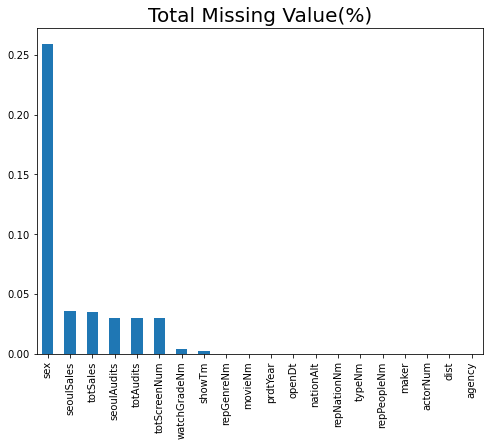

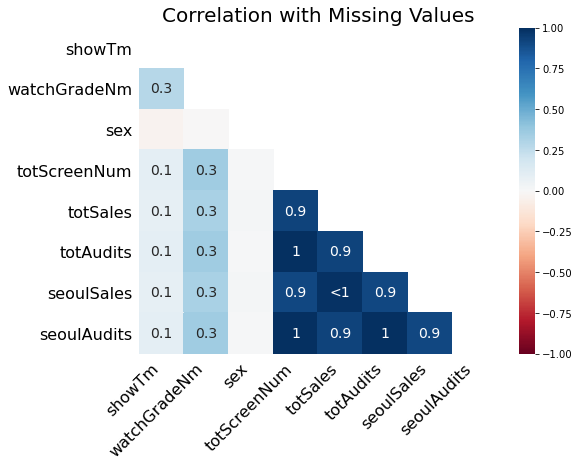

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('영화데이터.csv', index_col=0)

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind='bar', figsize= (8,6), fontsize =10)
plt.xlabel("",fontsize = 20)
plt.ylabel("",fontsize = 20)
plt.title("Total Missing Value(%)", fontsize=20)
plt.show()

import missingno as msno
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.heatmap(df[missingdata_df], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize=20)
plt.show()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('영화데이터.csv', index_col=0)

showTm_mean = df.showTm.mean()
df['showTm'] = df['showTm'].fillna(showTm_mean)

total_wat = int(len(df.watchGradeNm)) - int(df.watchGradeNm.isna().sum())
all_grade_num =len(df.loc[(df['watchGradeNm'].str.contains('전체관람가', na=False)), :])
all_grade_ratio = all_grade_num/total_wat
twelve_grade_num =len(df.loc[(df['watchGradeNm'].str.contains('12세관람가', na=False)) | (df['watchGradeNm'].str.contains('12세이상관람가', na=False)), :])
twelve_grade_ratio  = twelve_grade_num/total_wat
fifteen_grade_num =len(df.loc[(df['watchGradeNm'].str.contains('15세관람가', na=False)) | (df['watchGradeNm'].str.contains('15세이상관람가', na=False)), :])
fifteen_grade_ratio  = fifteen_grade_num/total_wat
eighteen_grade_num =len(df.loc[(df['watchGradeNm'].str.contains('18세관람가', na=False)) | (df['watchGradeNm'].str.contains('18세관람가', na=False)), :])
eighteen_grade_ratio  = eighteen_grade_num/total_wat
def fill_na():
    rnd_num = np.random.uniform(0, 1, 1)
    if rnd_num > 1 - eighteen_grade_ratio:
         x ='18세관람가'
    elif rnd_num > 1 - fifteen_grade_ratio:
         x ='15세관람가'
    elif rnd_num > 1 - twelve_grade_ratio:
         x ='12세관람가'
    else:
         x = '전체관람가'
    return x
df['watchGradeNm'] = df['watchGradeNm'].fillna(fill_na())

total_sex = int(len(df.sex)) - int(df.sex.isna().sum())
male_num =len(df.loc[(df['sex'].str.contains('남자', na=False)), :])
male_ratio = male_num /total_sex
female_num =len(df.loc[(df['sex'].str.contains('여자', na=False)), :])
female_ratio = female_num/total_sex
def fill_sex_na():
    rnd_num = np.random.uniform(0, 1, 1)
    if rnd_num > (1-male_ratio):
        x = '남자'
    else:
        x = '여자'
    return x
df['sex'] = df['sex'].fillna(fill_sex_na())

df = df.drop(['totScreenNum', 'totAudits', 'seoulSales', 'seoulAudits'], axis=1)
df['totSales'] = df['totSales'].fillna(df['totSales'].mean())

df['showTm'] = df['showTm'].apply(lambda x: x).astype(np.int64)
df['totSales'] = df['totSales'].apply(lambda x: x).astype(np.int64)

df.to_csv('영화데이터_1.csv')

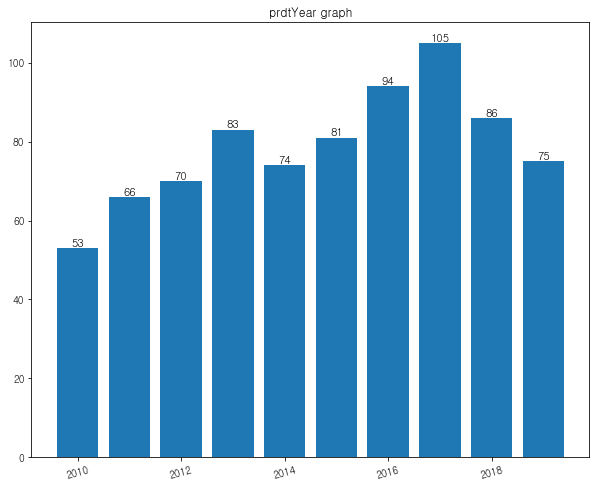

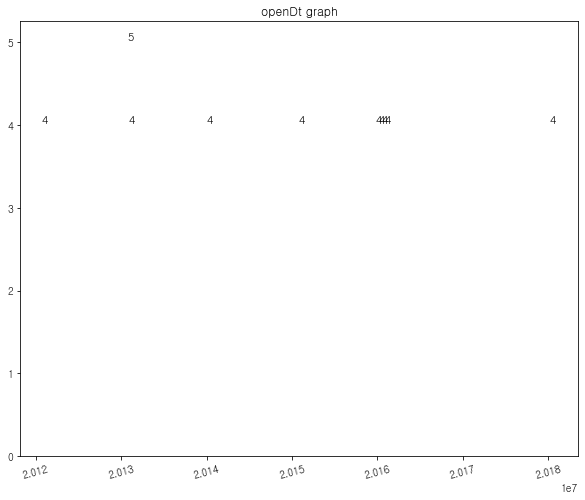

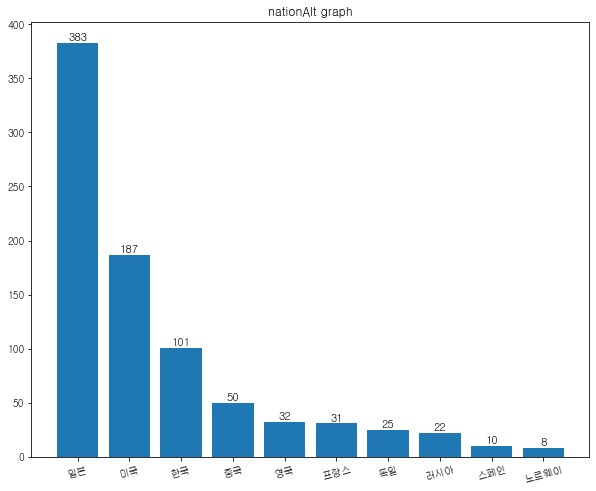

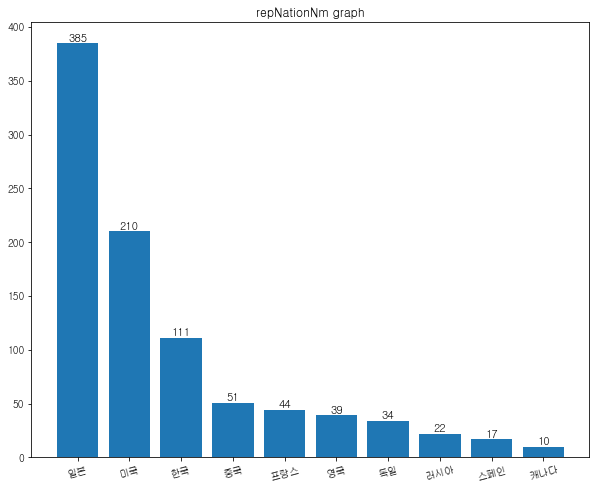

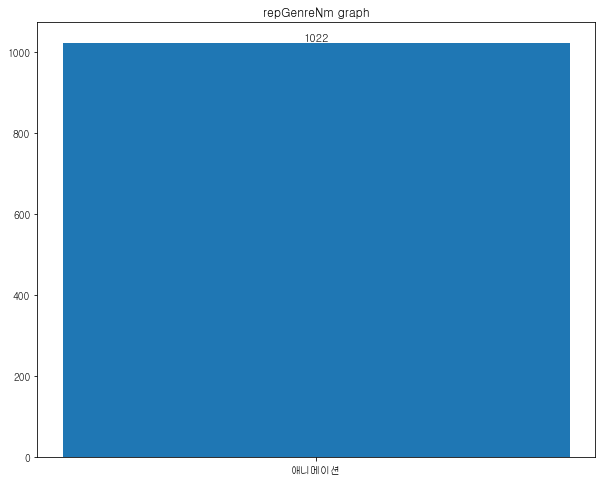

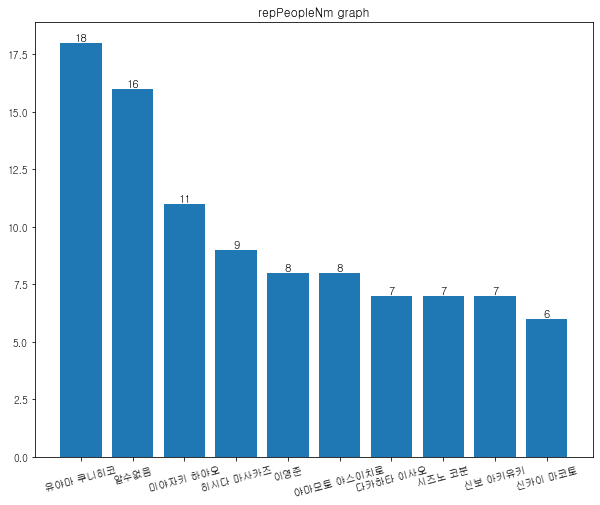

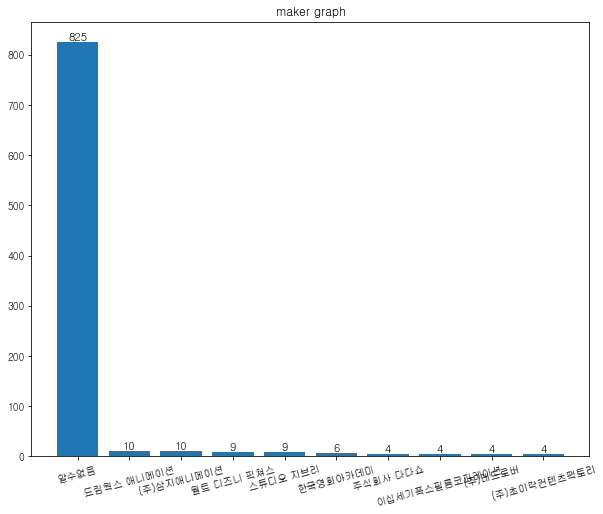

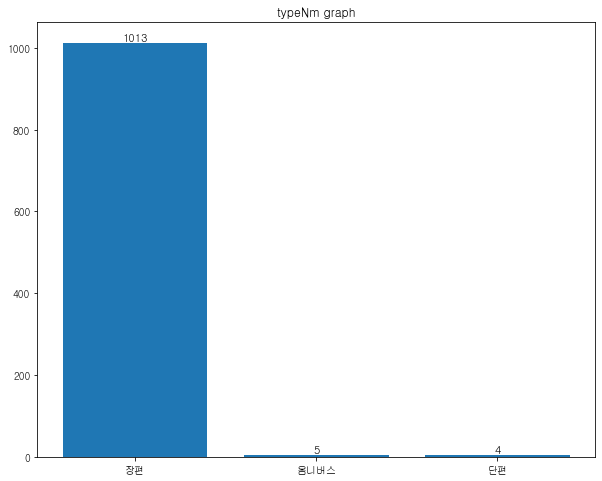

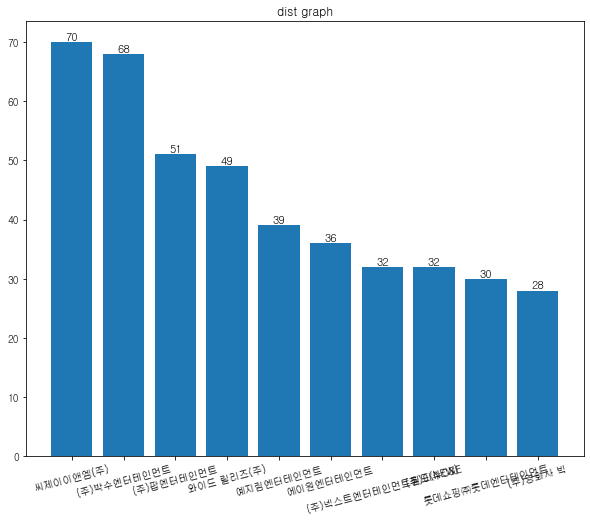

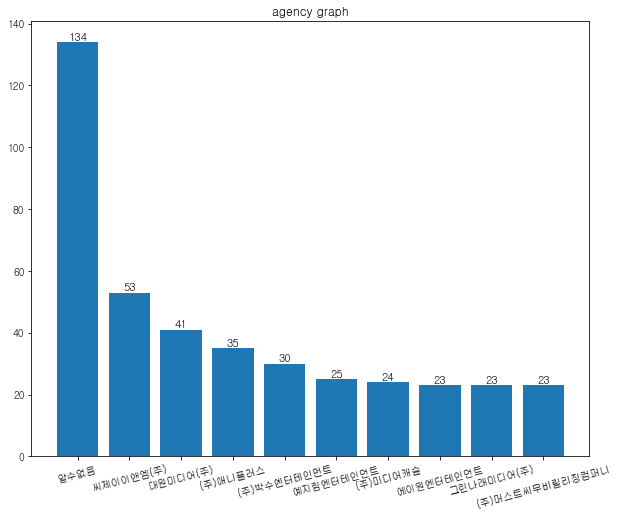

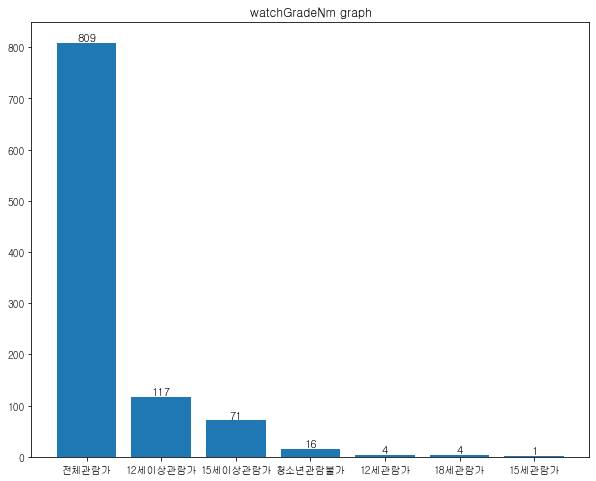

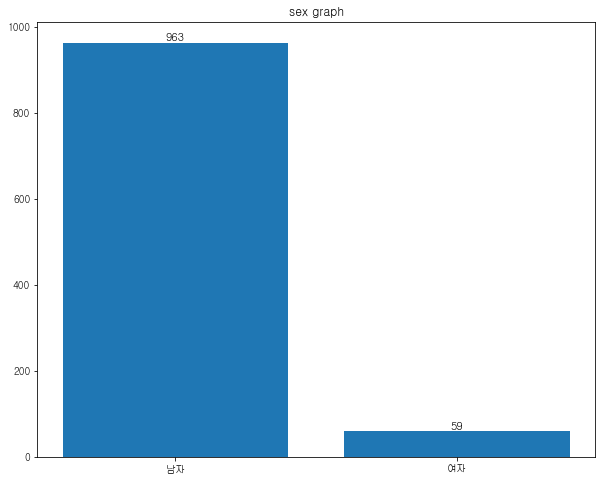

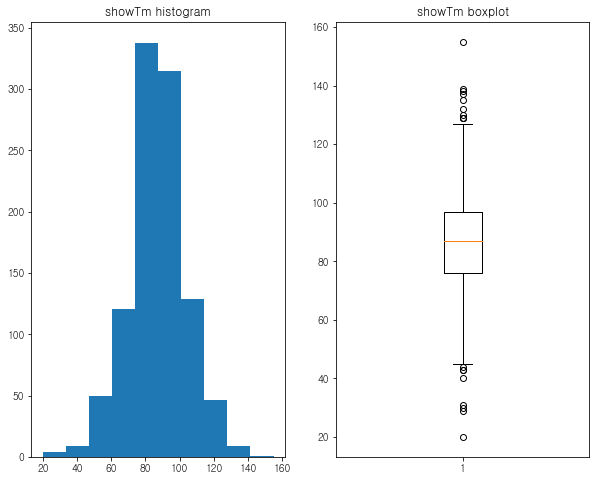

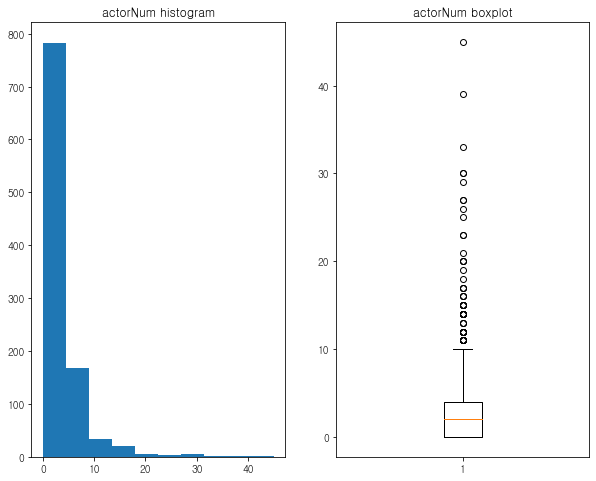

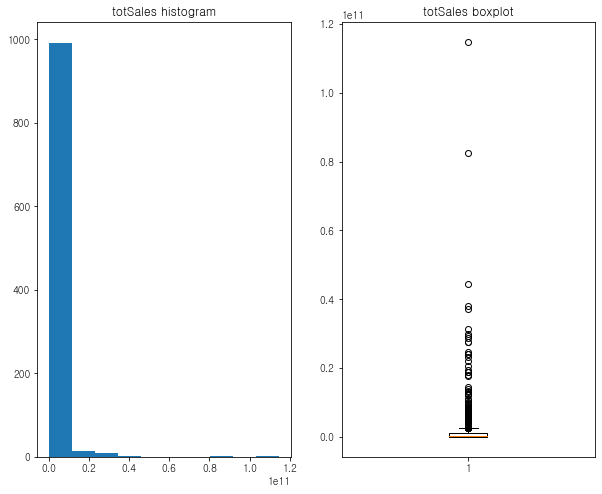

In [18]:
import matplotlib.font_manager as fm

#폰트 경로
font_path = "C:/Windows/Fonts/NGULIM.TTF"
#폰트 설정
fontprop = fm.FontProperties(fname=font_path, size=16)
plt.rc('font', family=fontprop.get_name())

def make_bar(df, column, max_print=10):
    column_n = df[column].value_counts()
    plt.rcParams['figure.figsize'] = [10, 8]
    if len(column_n) <= max_print:
        plt.bar(column_n.index, column_n.values)
        for i, v in enumerate(column_n.index):
            plt.text(v, column_n.values[i], column_n.values[i],
                     fontsize=11,
                     color='black',
                     horizontalalignment='center',
                     verticalalignment='bottom')
        plt.title("{} graph".format(column))
        plt.show()
    else:
        column_n_sorted = column_n.sort_values(ascending=False).head(max_print)
        plt.bar(column_n_sorted.index, column_n_sorted.values)
        for i, v in enumerate(column_n_sorted.index):
            plt.text(v, column_n_sorted.values[i], column_n_sorted.values[i],
                     fontsize=11,
                     color='black',
                     horizontalalignment='center',
                     verticalalignment='bottom')
        plt.xticks(rotation=15)
        plt.title("{} graph".format(column))
        plt.show()

def make_hist_boxplot(df, column):
    plt.rcParams['figure.figsize'] = [10, 8]
    flg = plt.figure()
    ax = flg.add_subplot(1, 2, 1)
    plt.hist(df[column])
    ax.set_title("{} histogram".format(column))
    ax = flg.add_subplot(1, 2, 2)
    plt.boxplot(df[column])
    ax.set_title("{} boxplot".format(column))
    plt.show()

make_bar(df, 'prdtYear')
make_bar(df, 'openDt')
make_bar(df, 'nationAlt')
make_bar(df, 'repNationNm')
make_bar(df, 'repGenreNm')
make_bar(df, 'repPeopleNm')
make_bar(df, 'maker')
make_bar(df, 'typeNm')
make_bar(df, 'dist')
make_bar(df, 'agency')
make_bar(df, 'watchGradeNm')
make_bar(df, 'sex')
make_hist_boxplot(df, 'showTm')
make_hist_boxplot(df, 'actorNum')
make_hist_boxplot(df, 'totSales')

In [82]:
df = pd.read_csv('영화데이터_1.csv', index_col=0)
print(df)

# 개봉년도 생성
df['openYr'] = ''
for i in range(0, len(df.index)):
    df['openYr'][i] = str(df['openDt'][i])[0:4]                                                                
print(df)

# 방학여부 생성
df['vacation'] = ''
print(df.info())
win_vac = ['01', '02']
sum_vac = ['07', '08']
for i in range(0, len(df.index)):
    vac = str(df['openDt'][i])[4:6]
    if vac in win_vac:
        df['vacation'][i] = '겨울방학'
    elif vac in sum_vac:
        df['vacation'][i] = '여름방학'
    else:
        df['vacation'][i] = '학기'
print(df)

# 합작작품여부 생성
df['nationCol'] = ''
for i in range(0, len(df.index)):
    result = df['nationAlt'][i][0:].split(',')
    if len(result) == 1:
        df['nationCol'][i] = '단일작품'
    else:
        df['nationCol'][i] = '합작작품'
print(df)

# 문화권 생성
ocea = ['호주']
etc = ['기타']
africa = ['남아프리카공화국']
nAm = ['미국']
mid = ['이스라엘','아랍에미리트연합국정부','카타르']
sAm = ['멕시코','페루', '아르헨티나','쿠바','브라질']
asia = ['말레이시아','홍콩','인도','중국','싱가포르','한국','일본','태국']
eu = ['스웨덴','에스토니아','우크라이나','스페인','체코','슬로바키아','프랑스','독일','러시아','핀란드','네덜란드','이탈리아','덴마크','폴란드','루마니아','벨기에','아일랜드','룩셈부르크','스위스','노르웨이','영국','크로아티아']
# 위 데이터는 노가다로 얻음

df['culture'] = ''
for i in range(0, len(df.index)):
    result = df['repNationNm'][i]
    if result in ocea:
        df['culture'][i] = '오세아니아'
    elif result in etc:
        df['culture'][i] = '기타'
    elif result in africa:
        df['culture'][i] = '아프리카'
    elif result in nAm:
        df['culture'][i] = '북미'
    elif result in mid:
        df['culture'][i] = '중동'
    elif result in sAm:
        df['culture'][i] = '중남미'
    elif result in asia:
        df['culture'][i] = '아시아'
    else:
        df['culture'][i] = '유럽'
print(df)

# watchGradeNm 데이터 수정
df['watchGradeNm'] = df['watchGradeNm'].replace('12세이상관람가', '12세관람가')
df['watchGradeNm'] = df['watchGradeNm'].replace('15세이상관람가', '15세관람가')
df['watchGradeNm'] = df['watchGradeNm'].replace('청소년관람불가', '18세관람가')
print(df)

# 중복제거
df = df.drop_duplicates(['movieNm'], keep='first')
print(df)

df.to_csv('영화데이터_2.csv')

       movieCd                           movieNm  prdtYear    openDt  \
0     20179942                            러빙 빈센트      2017  20171109   
1     20151815                          뮨: 달의 요정      2014  20150924   
2     20202128               100% 울프: 푸들이 될 순 없어      2020  20201224   
3     20199161  사이코패스 시너스 오브 더 시스템 케이스2: 퍼스트 가디언      2019  20191026   
4     20199107     사이코패스 시너스 오브 더 시스템 케이스1: 죄와 벌      2019  20191026   
...        ...                               ...       ...       ...   
1017  20111468                          홍길동 2084      2011  20110818   
1018  20081282                              번개아텀      1971  20080918   
1019  20111536                        쥴리의 육지 대모험      2011  20110908   
1020  20112163             극장판 아따맘마3D : 엄마는 초능력자      2010  20110908   
1021  20119972                          노미오와 줄리엣      2011  20110414   

        nationAlt repNationNm repGenreNm repPeopleNm      maker  showTm  \
0          영국,폴란드          영국      애니메이션    도로타 코비엘라       알

<ipython-input-82-3da9327876fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['openYr'][i] = str(df['openDt'][i])[0:4]
<ipython-input-82-3da9327876fd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vacation'][i] = '학기'
<ipython-input-82-3da9327876fd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vacation'][i] = '겨울방학'
<ipython-input-82-3da9327876fd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy

       movieCd                           movieNm  prdtYear    openDt  \
0     20179942                            러빙 빈센트      2017  20171109   
1     20151815                          뮨: 달의 요정      2014  20150924   
2     20202128               100% 울프: 푸들이 될 순 없어      2020  20201224   
3     20199161  사이코패스 시너스 오브 더 시스템 케이스2: 퍼스트 가디언      2019  20191026   
4     20199107     사이코패스 시너스 오브 더 시스템 케이스1: 죄와 벌      2019  20191026   
...        ...                               ...       ...       ...   
1017  20111468                          홍길동 2084      2011  20110818   
1018  20081282                              번개아텀      1971  20080918   
1019  20111536                        쥴리의 육지 대모험      2011  20110908   
1020  20112163             극장판 아따맘마3D : 엄마는 초능력자      2010  20110908   
1021  20119972                          노미오와 줄리엣      2011  20110414   

        nationAlt repNationNm repGenreNm repPeopleNm      maker  showTm  \
0          영국,폴란드          영국      애니메이션    도로타 코비엘라       알

<ipython-input-82-3da9327876fd>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['culture'][i] = '유럽'
<ipython-input-82-3da9327876fd>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['culture'][i] = '오세아니아'
<ipython-input-82-3da9327876fd>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['culture'][i] = '아시아'
<ipython-input-82-3da9327876fd>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

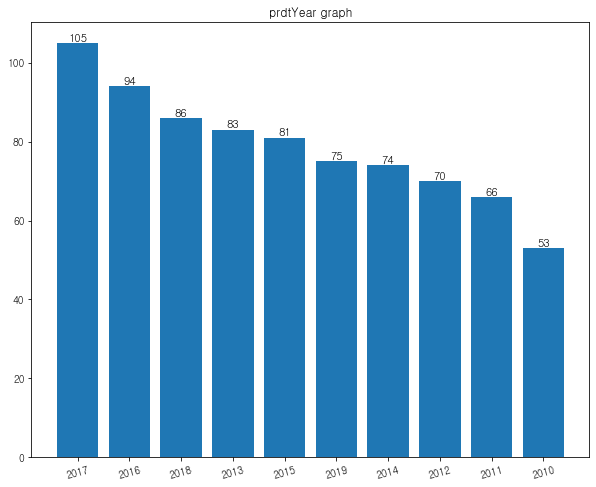

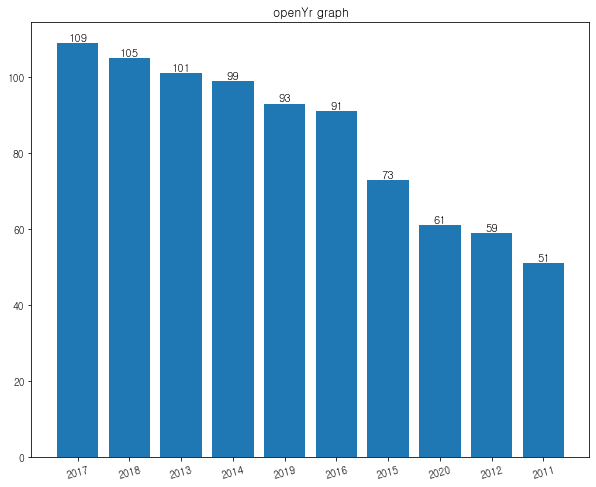

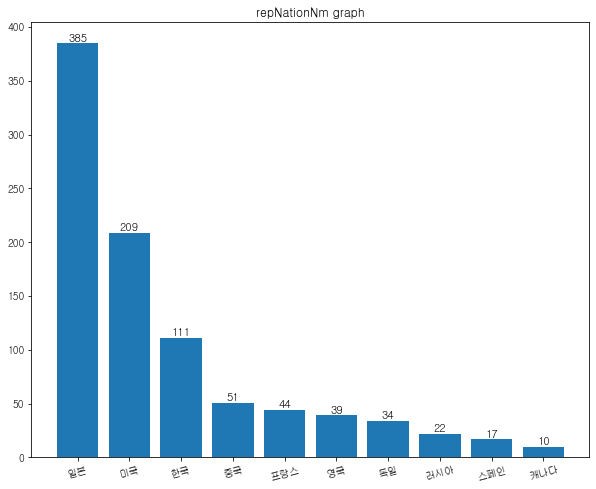

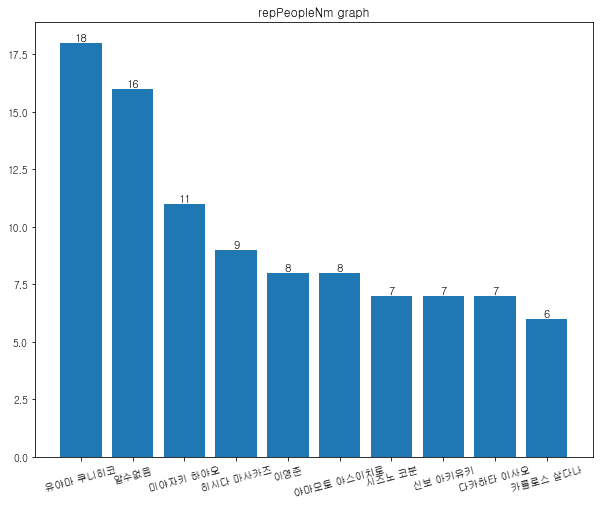

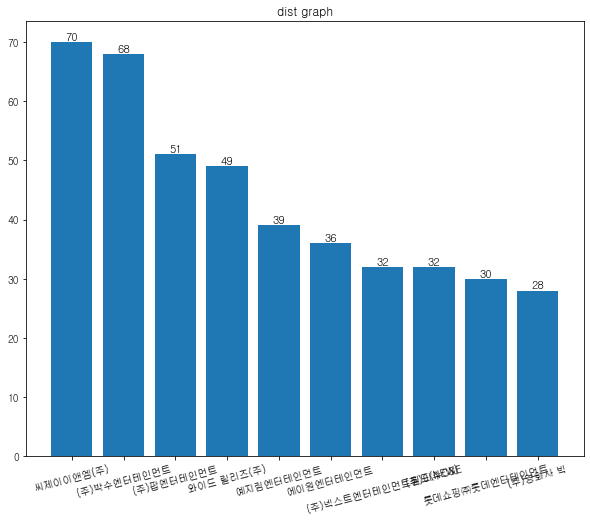

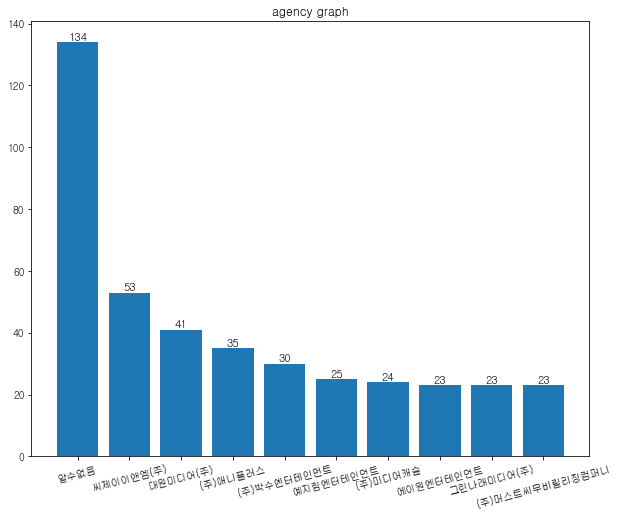

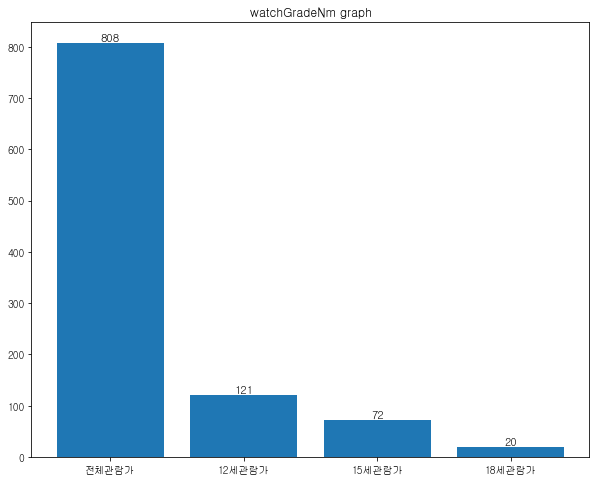

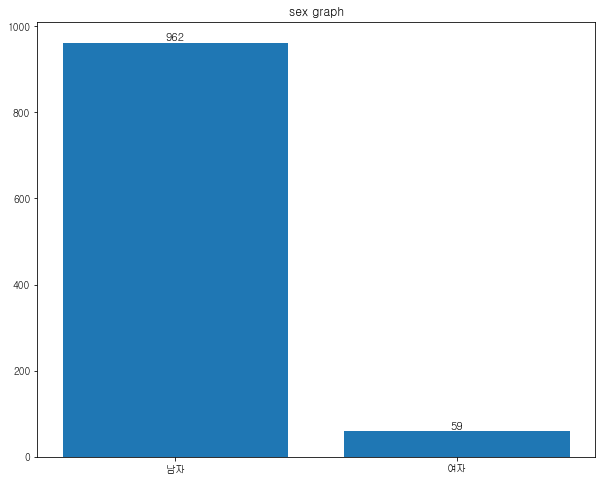

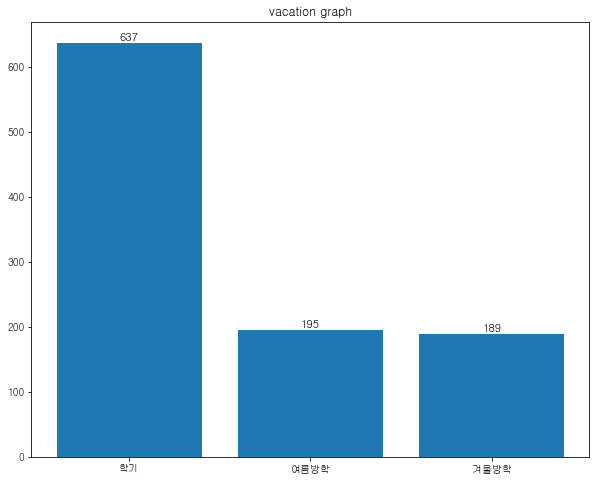

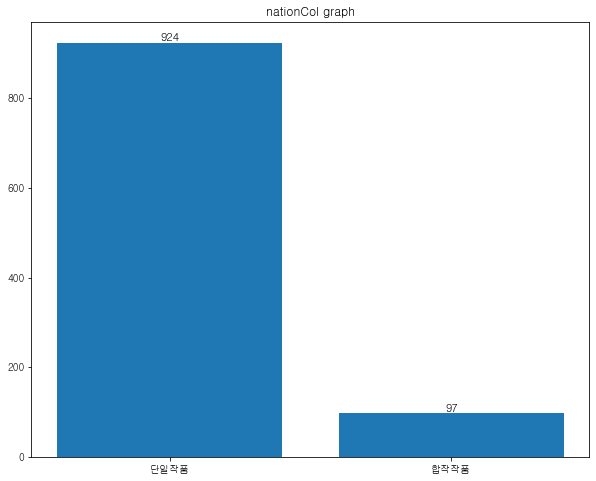

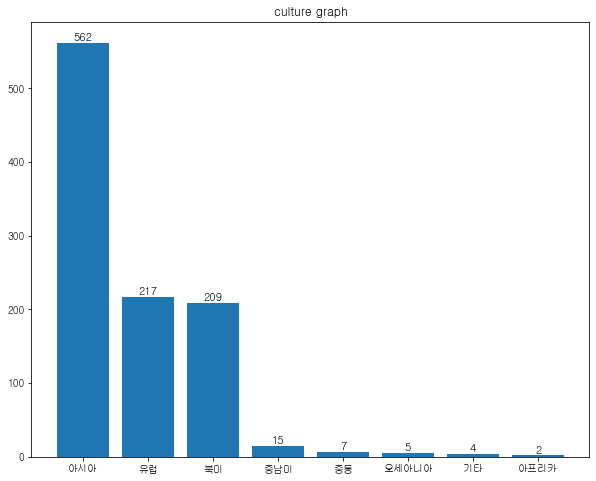

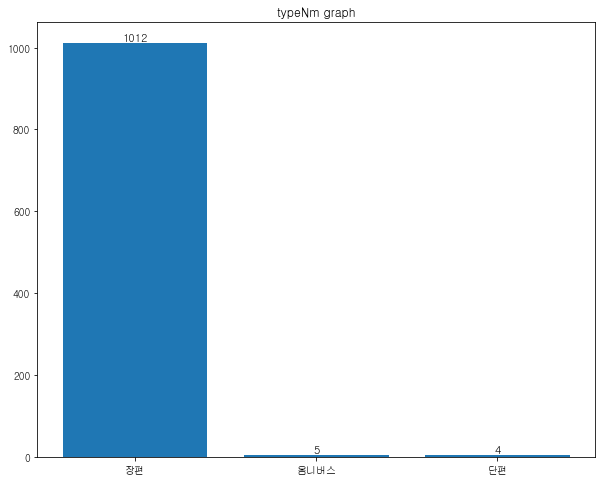

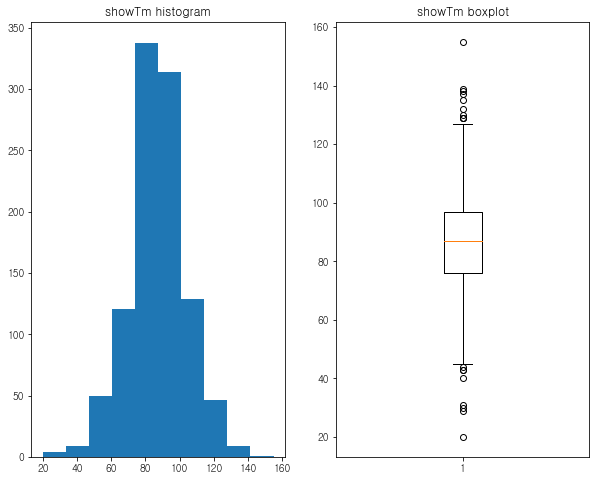

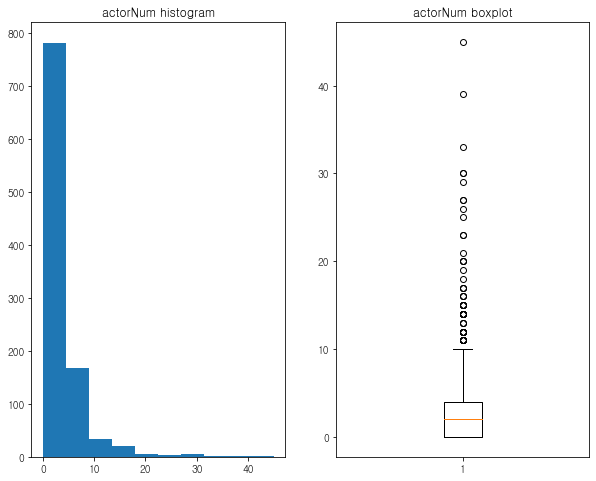

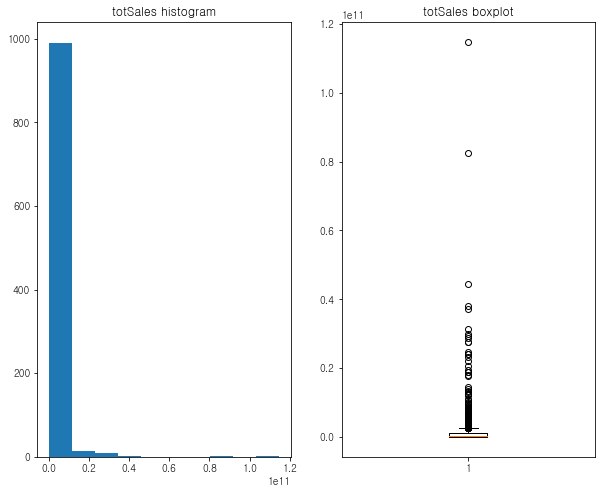

In [84]:
df = pd.read_csv('영화데이터_2.csv', index_col=0)

# 못 지운거, 데이터 형태 변환 못 한거 했음.
df = df.drop(['repGenreNm'], axis=1)
df['openYr'] = df['openYr'].astype(str)
df['prdtYear'] = df['prdtYear'].astype(str)

def make_bar(df, column, max_print=10):
    column_n = df[column].value_counts()
    plt.rcParams['figure.figsize'] = [10, 8]
    if len(column_n) <= max_print:
        plt.bar(column_n.index, column_n.values)
        for i, v in enumerate(column_n.index):
            plt.text(v, column_n.values[i], column_n.values[i],
                     fontsize=11,
                     color='black',
                     horizontalalignment='center',
                     verticalalignment='bottom')
        plt.title("{} graph".format(column))
        plt.show()
    else:
        column_n_sorted = column_n.sort_values(ascending=False).head(max_print)
        plt.bar(column_n_sorted.index, column_n_sorted.values)
        for i, v in enumerate(column_n_sorted.index):
            plt.text(v, column_n_sorted.values[i], column_n_sorted.values[i],
                     fontsize=11,
                     color='black',
                     horizontalalignment='center',
                     verticalalignment='bottom')
        plt.xticks(rotation=15)
        plt.title("{} graph".format(column))
        plt.show()

def make_hist_boxplot(df, column):
    plt.rcParams['figure.figsize'] = [10, 8]
    flg = plt.figure()
    ax = flg.add_subplot(1, 2, 1)
    plt.hist(df[column])
    ax.set_title("{} histogram".format(column))
    ax = flg.add_subplot(1, 2, 2)
    plt.boxplot(df[column])
    ax.set_title("{} boxplot".format(column))
    plt.show()

make_bar(df, 'prdtYear')
make_bar(df, 'openYr')
make_bar(df, 'repNationNm')
make_bar(df, 'repPeopleNm')
make_bar(df, 'dist')
make_bar(df, 'agency')
make_bar(df, 'watchGradeNm')
make_bar(df, 'sex')
make_bar(df, 'vacation')
make_bar(df, 'nationCol')
make_bar(df, 'culture')
make_bar(df, 'typeNm')
make_hist_boxplot(df, 'showTm')
make_hist_boxplot(df, 'actorNum')
make_hist_boxplot(df, 'totSales')

In [100]:
df = pd.read_csv('영화데이터_2.csv', index_col=0)

def remove_showTm_outlier(df, columns):
    showTm_data = df[columns]
    quan_75 = np.percentile(showTm_data.values, 75)
    quan_25 = np.percentile(showTm_data.values, 25)
    iqr = (quan_75 - quan_25)
    upperEx = quan_75 + (iqr*1.5)
    lowerEx =  quan_25 - (iqr*1.5)
    outlier_index = showTm_data[(showTm_data > upperEx) | (showTm_data < lowerEx)].index
    df.drop(outlier_index, axis=0, inplace=True)
    return df
df = remove_showTm_outlier(df, 'showTm')

def remove_actorNum_sales_outlier(df, columns):
    df = df.sort_values(by=columns, ascending=False)
    for i in range(0,3):
        df.drop(df[columns].index[0], axis=0, inplace=True)
    return df
df = remove_actorNum_sales_outlier(df,'actorNum')
df = remove_actorNum_sales_outlier(df,'totSales')
df = df.reset_index()
df = df.drop(['index'], axis=1)

df.to_csv('영화데이터_3.csv')

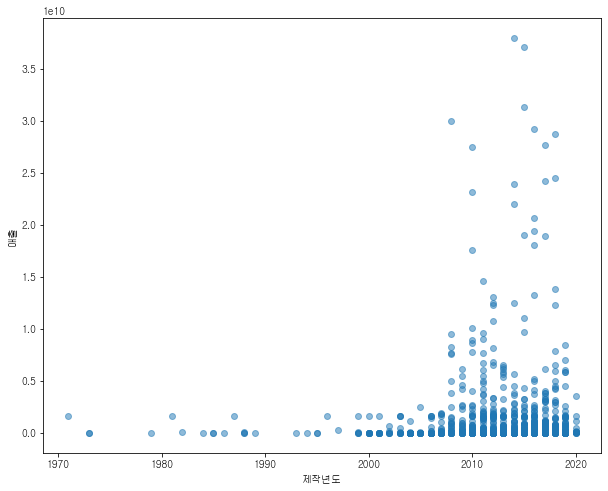

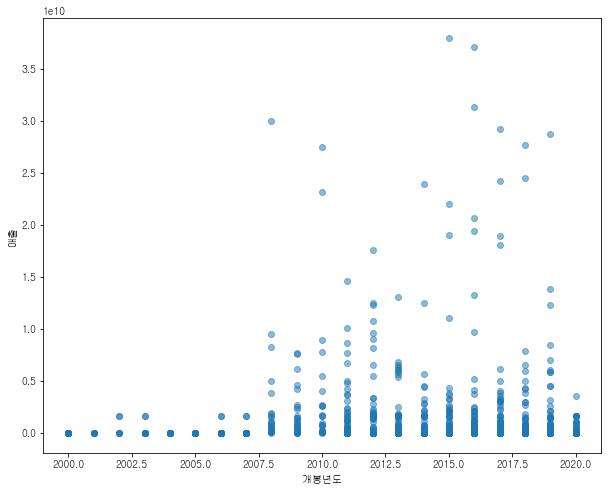

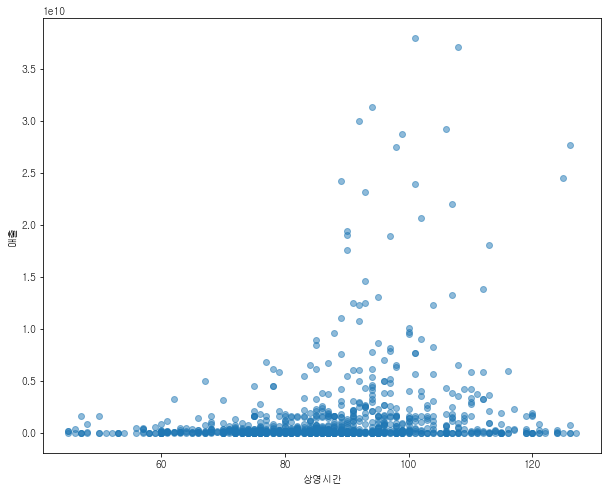

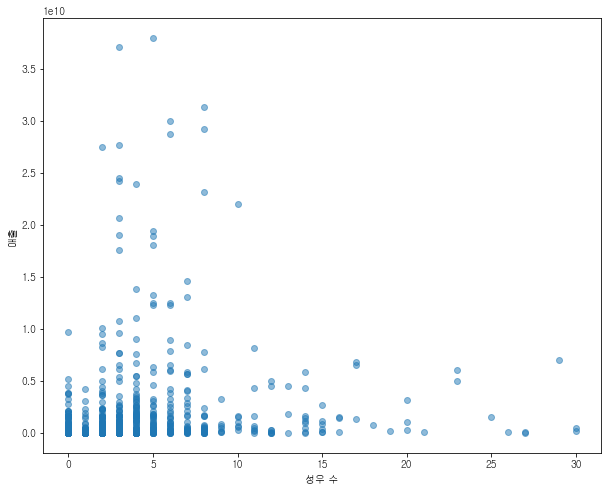

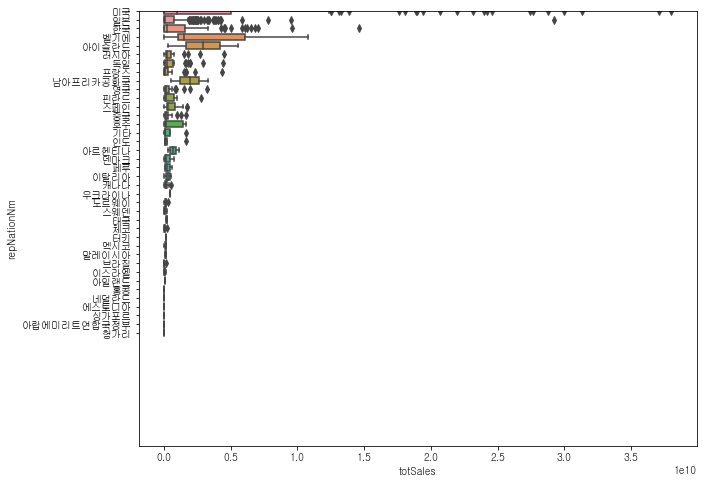

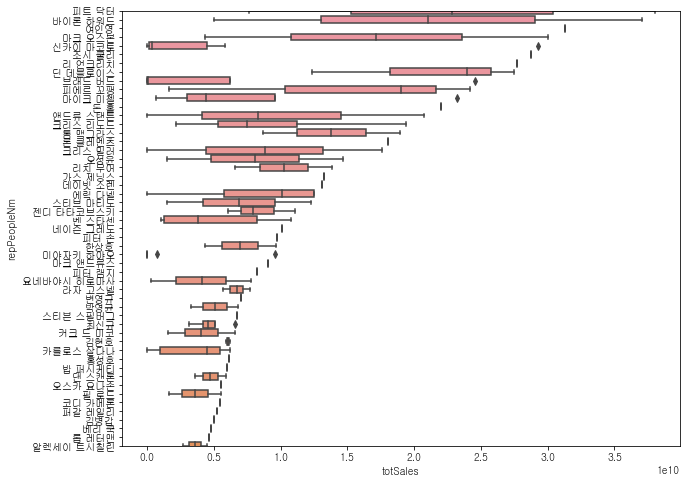

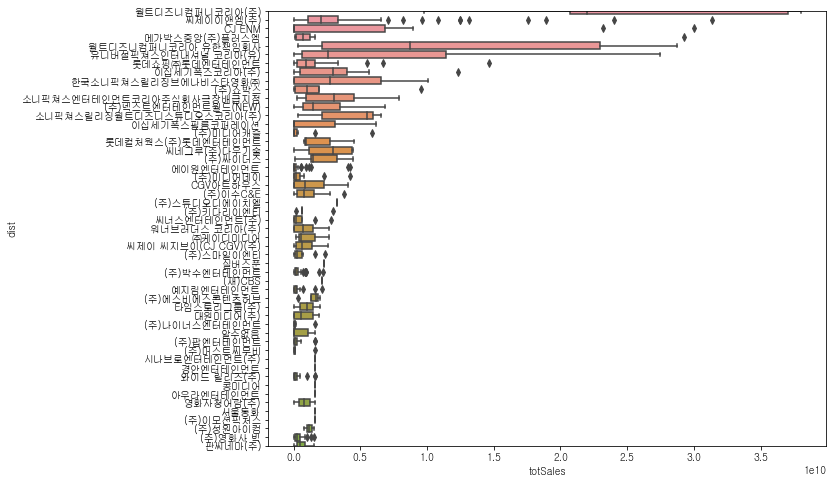

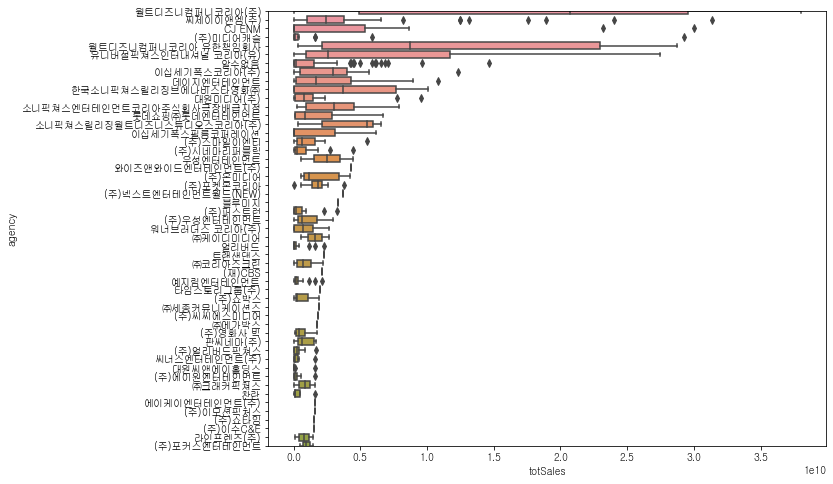

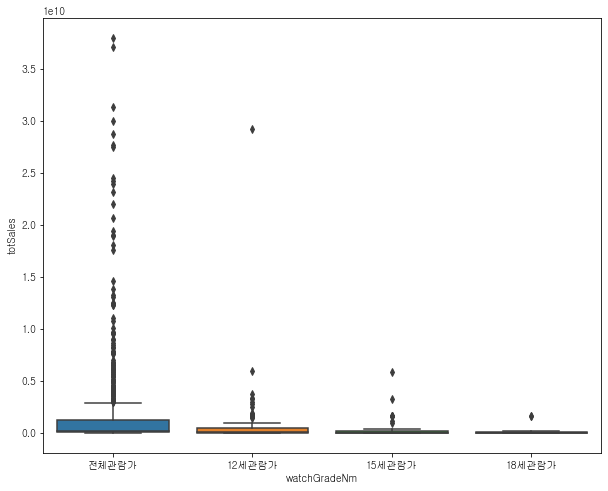

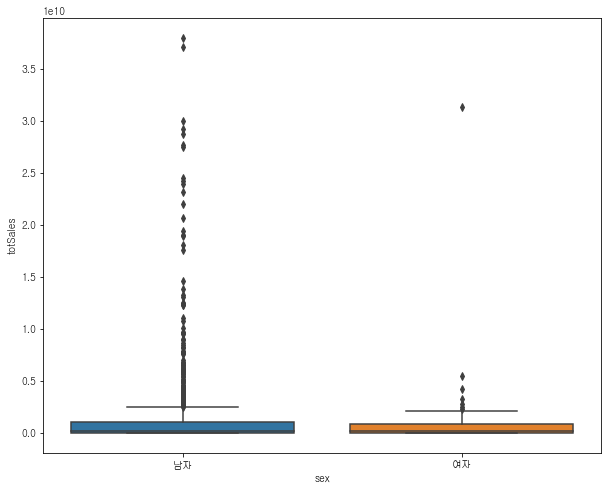

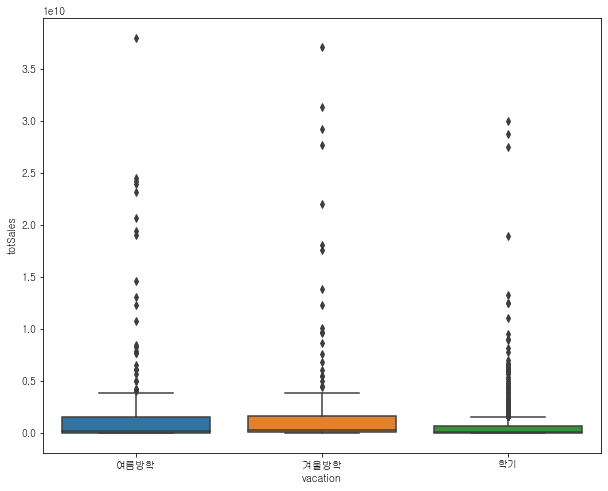

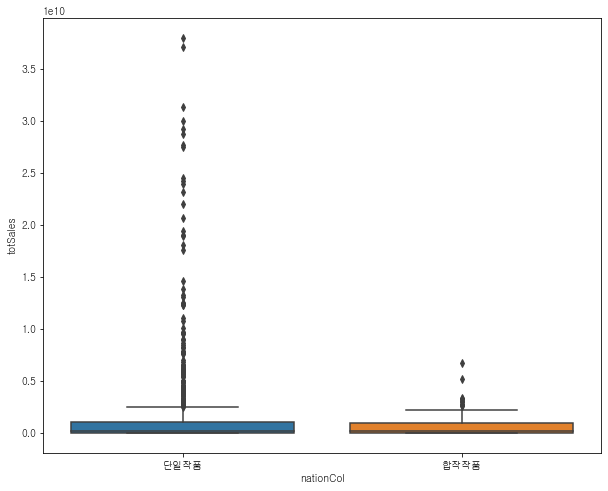

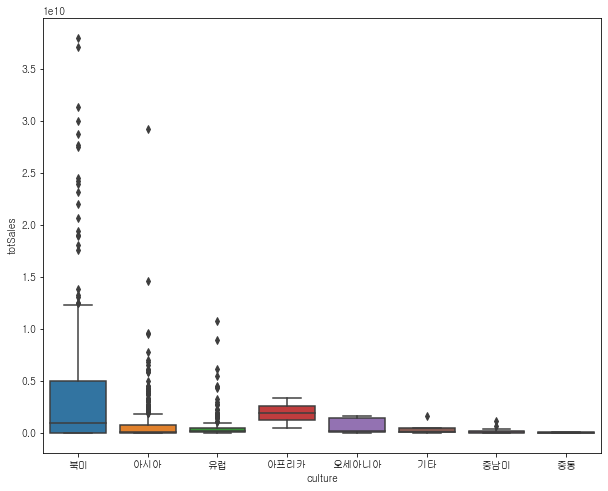

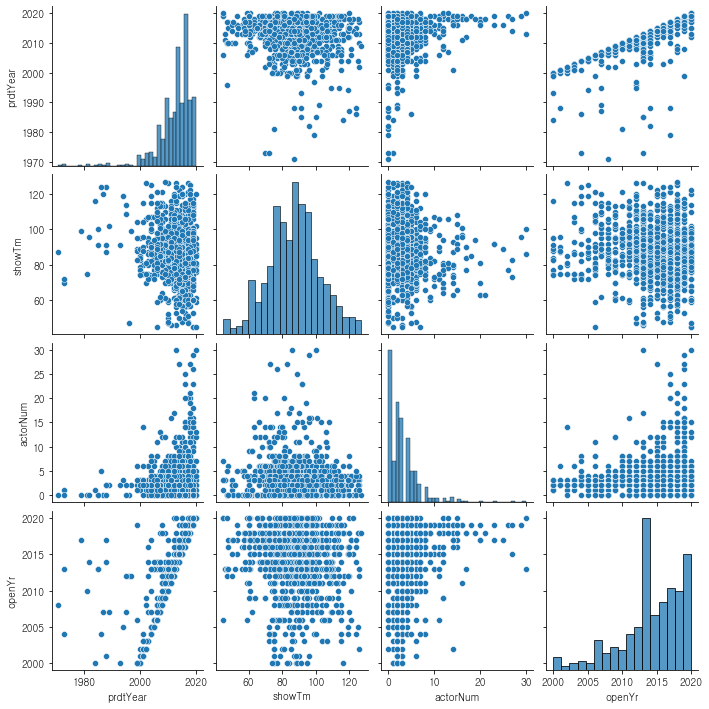

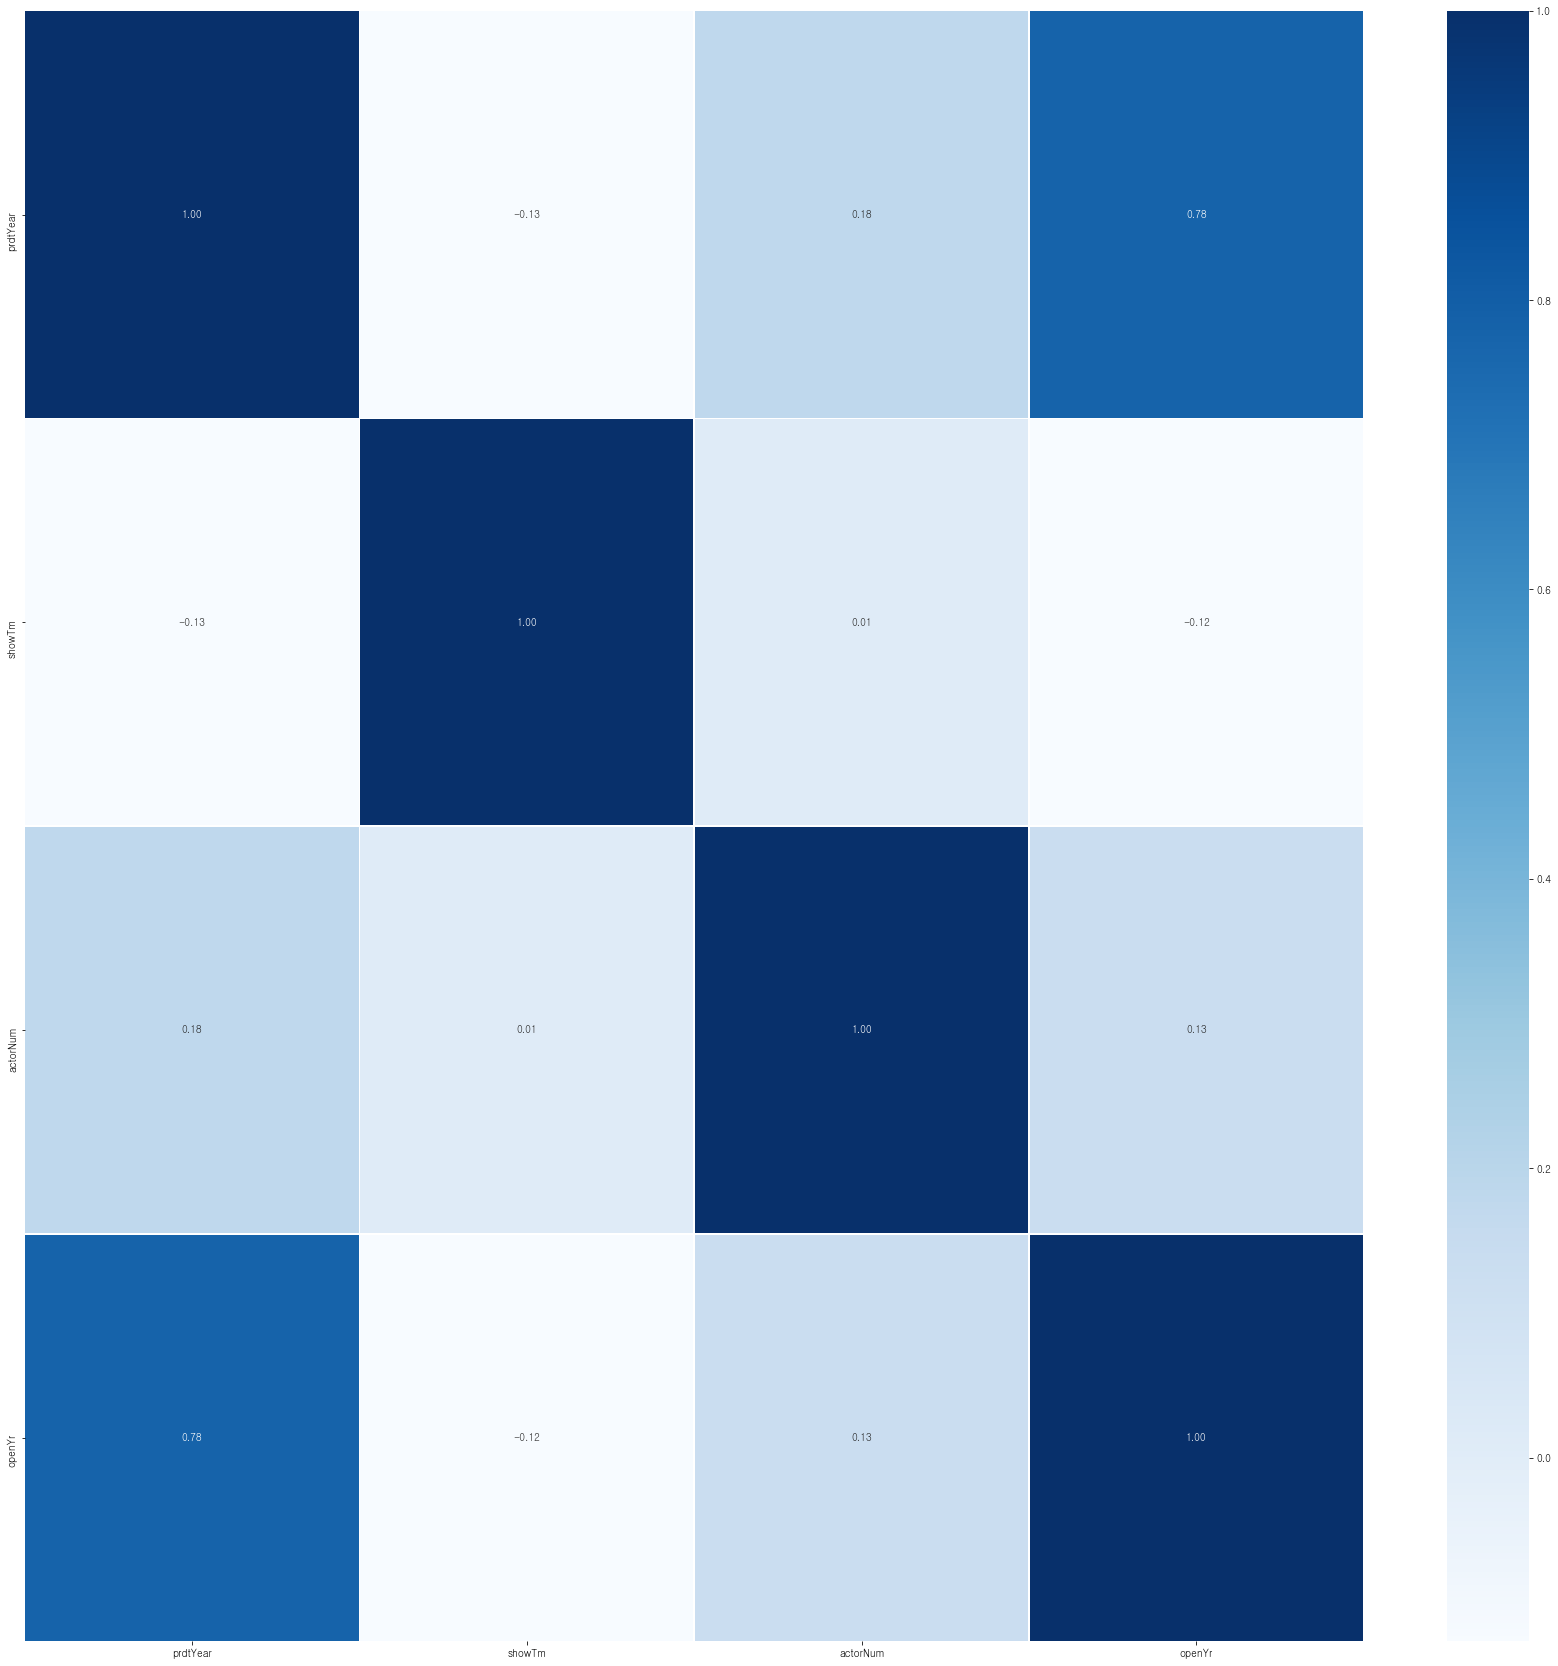

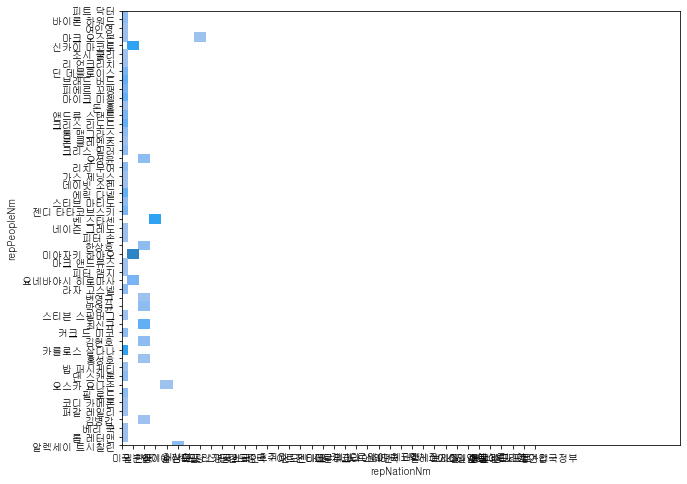

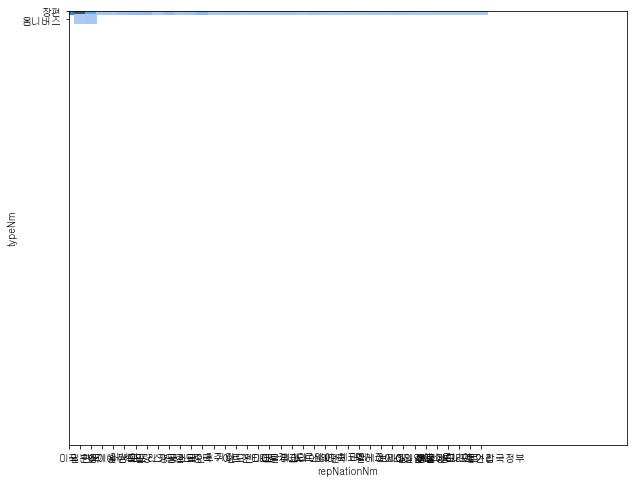

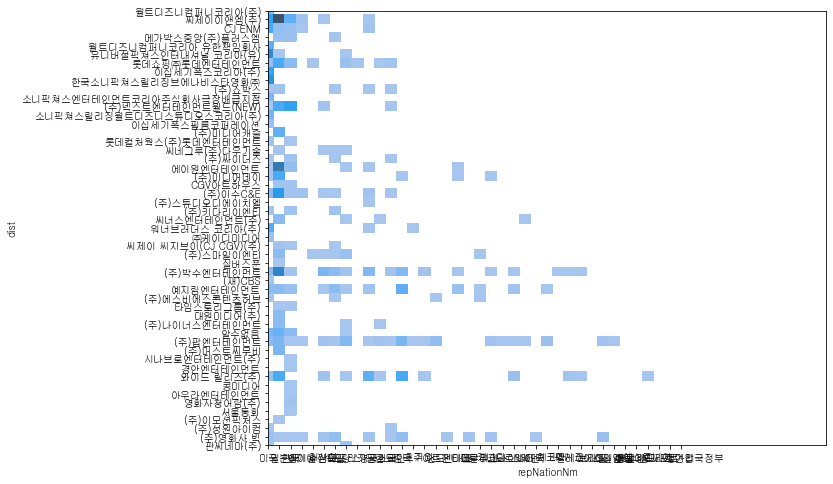

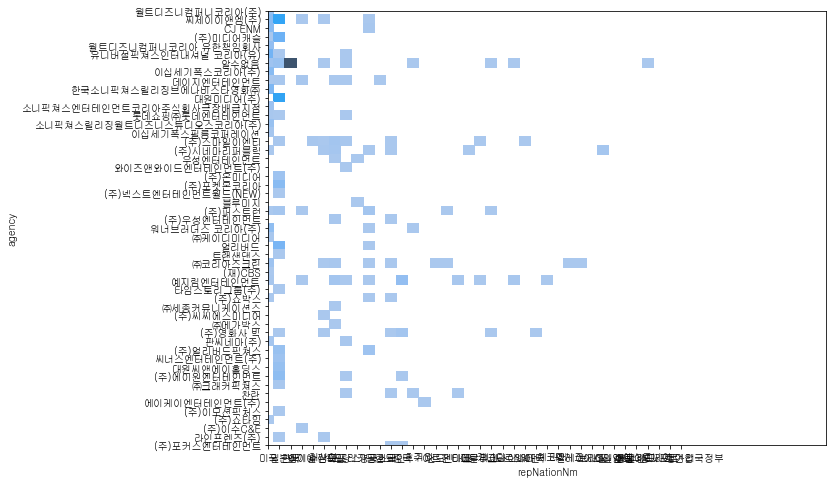

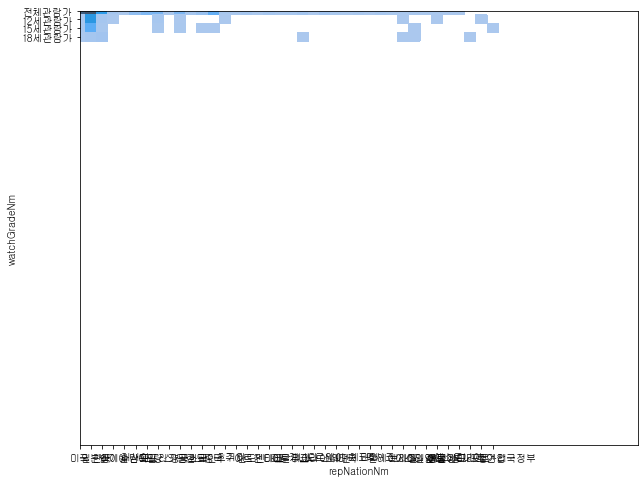

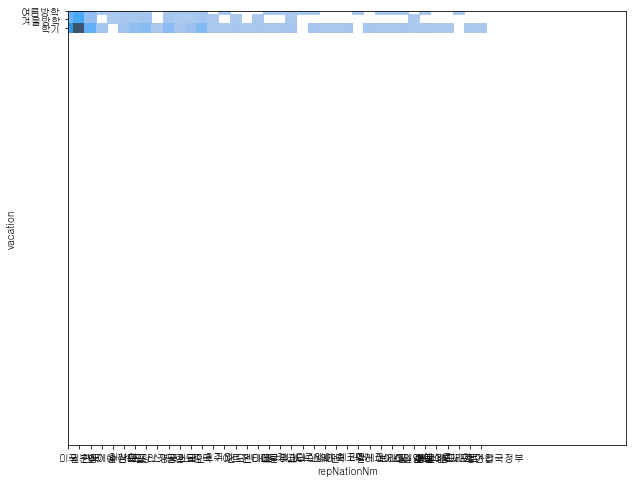

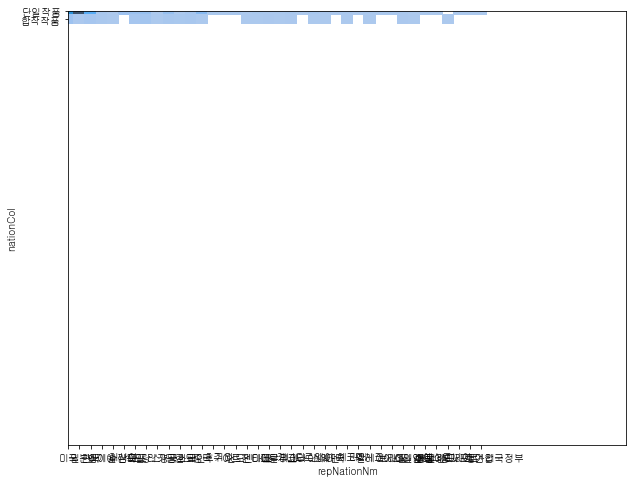

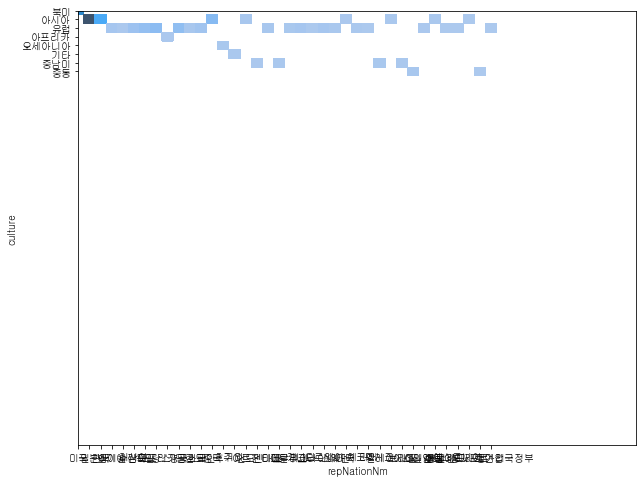

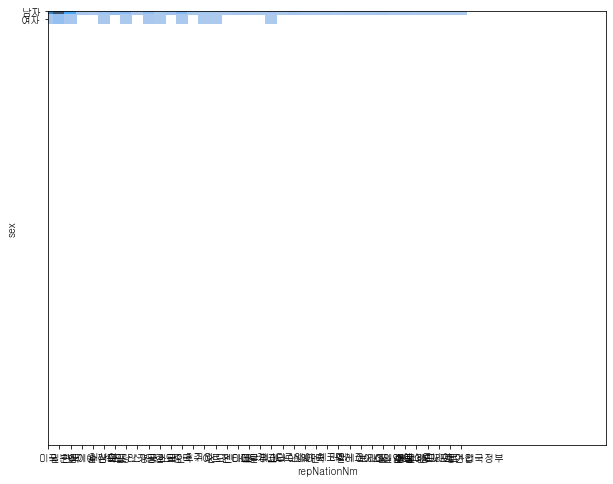

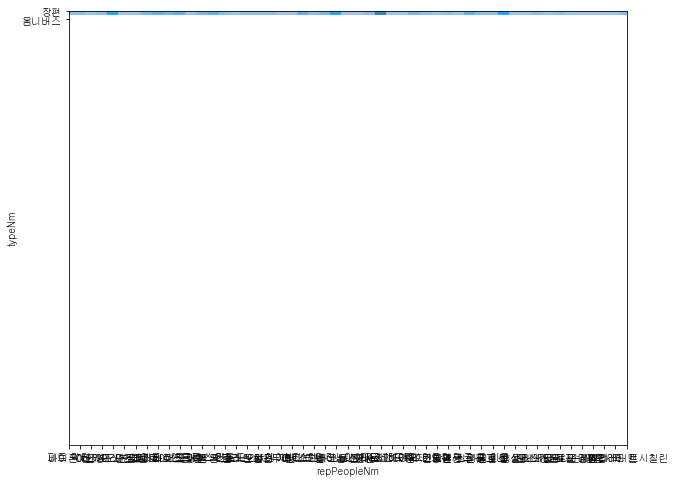

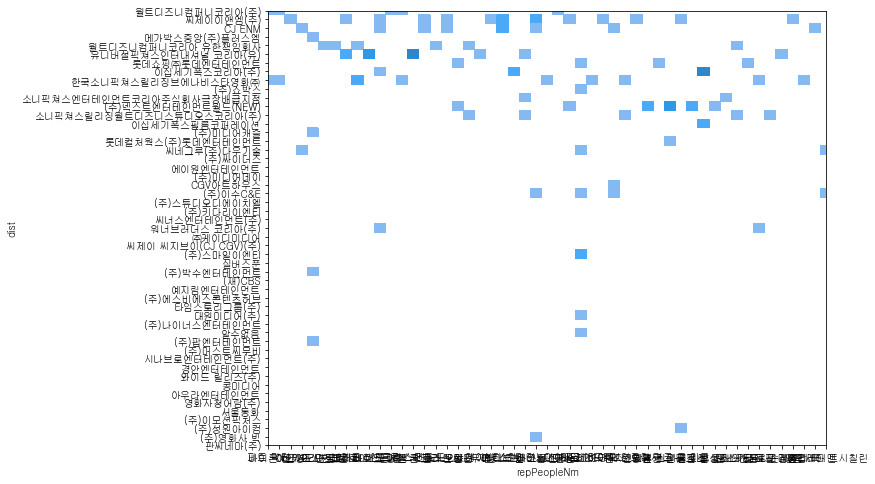

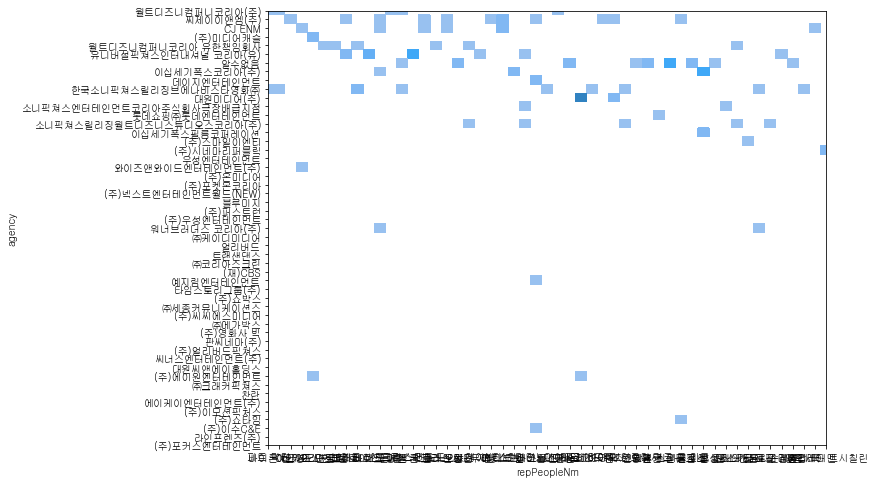

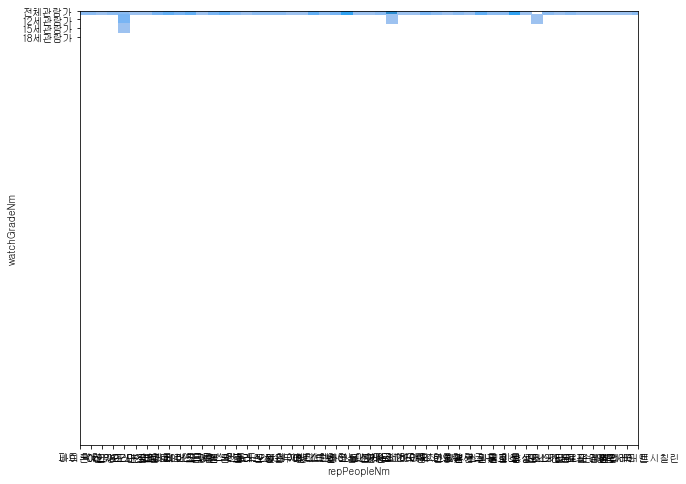

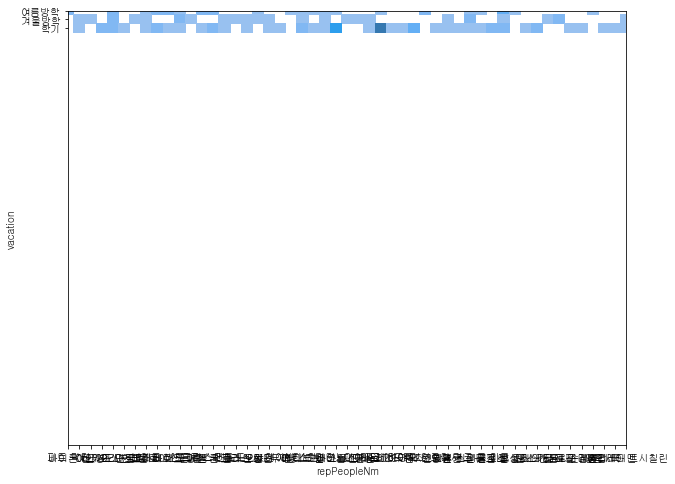

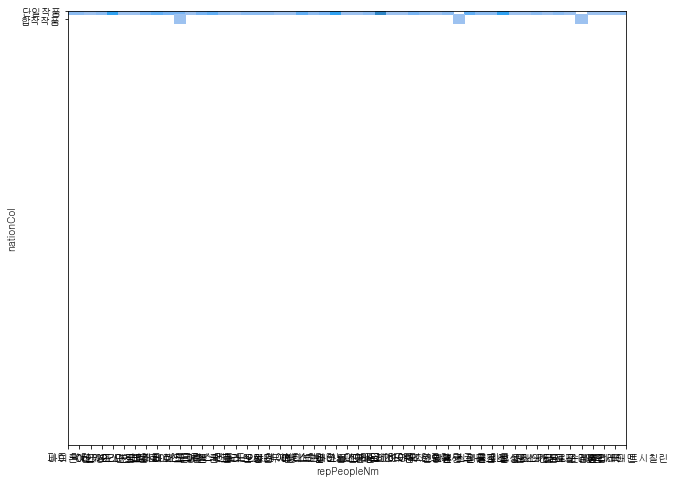

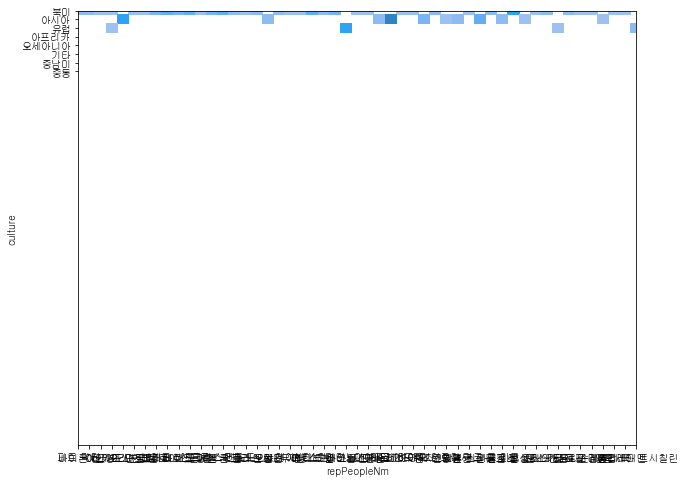

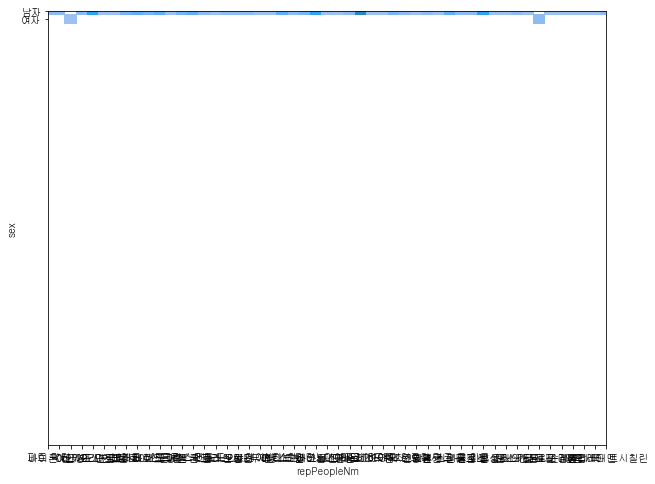

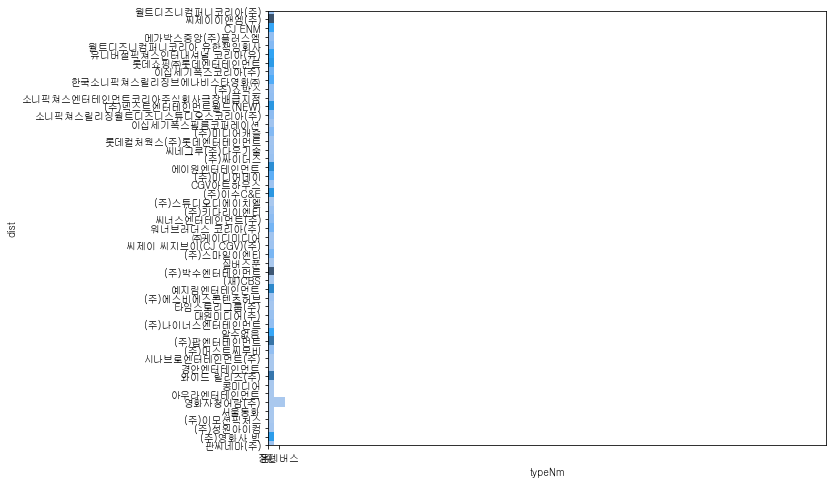

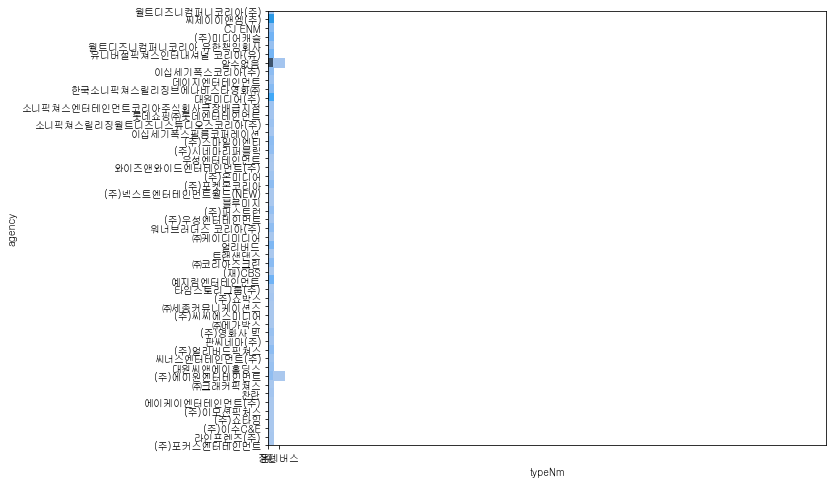

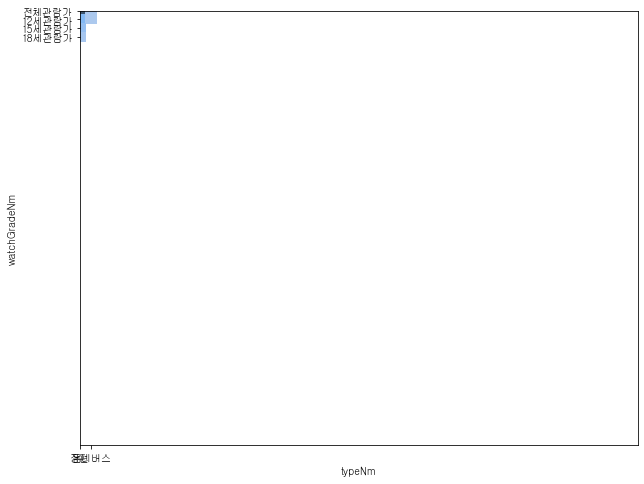

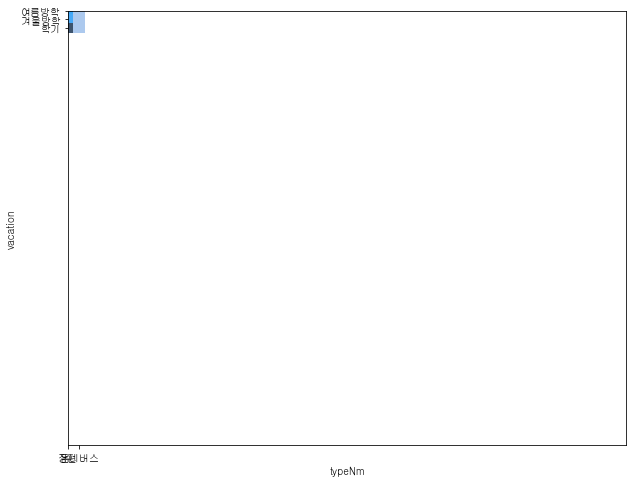

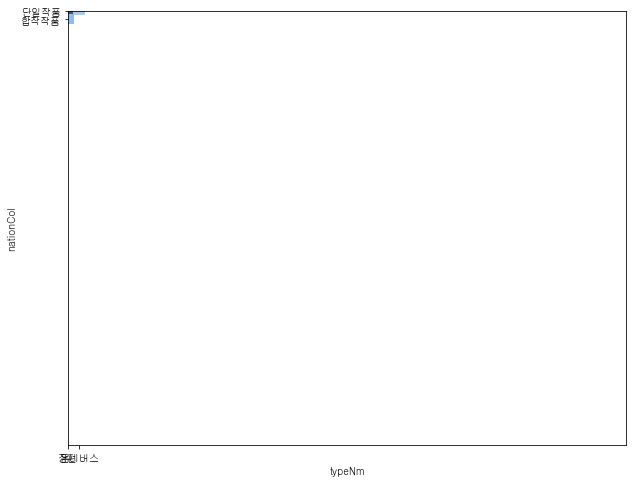

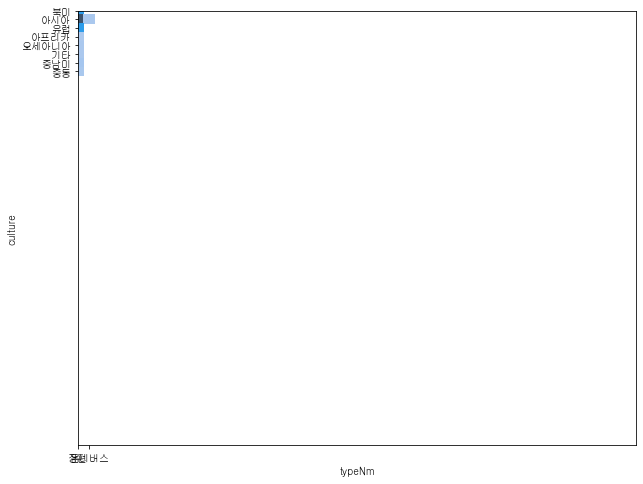

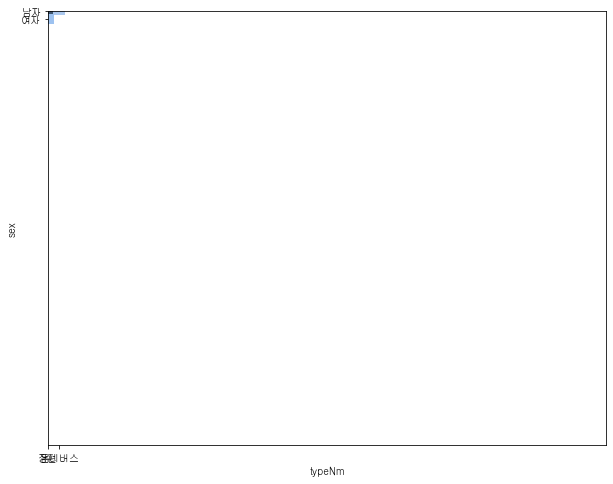

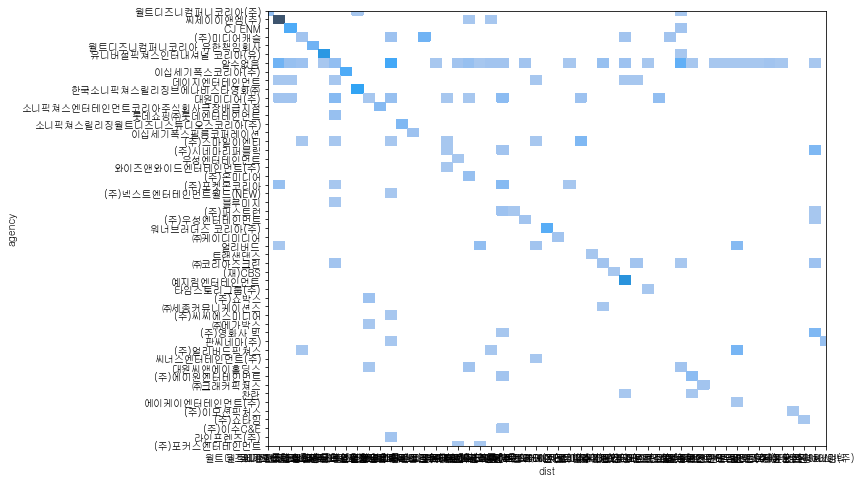

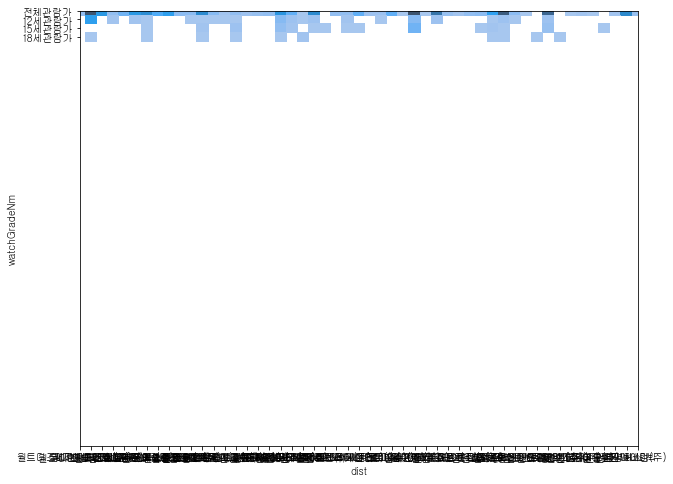

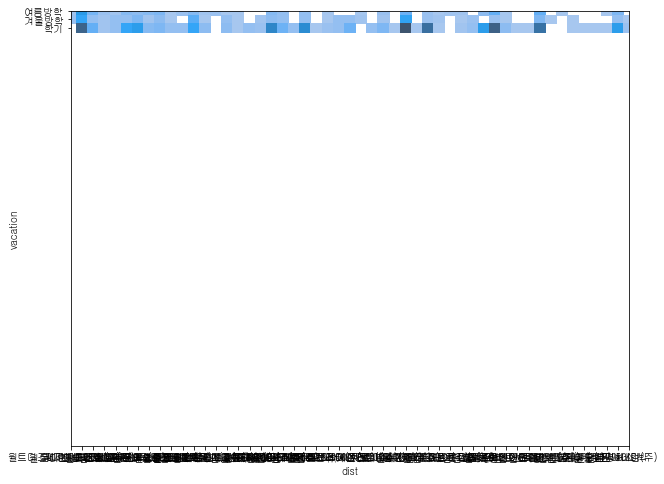

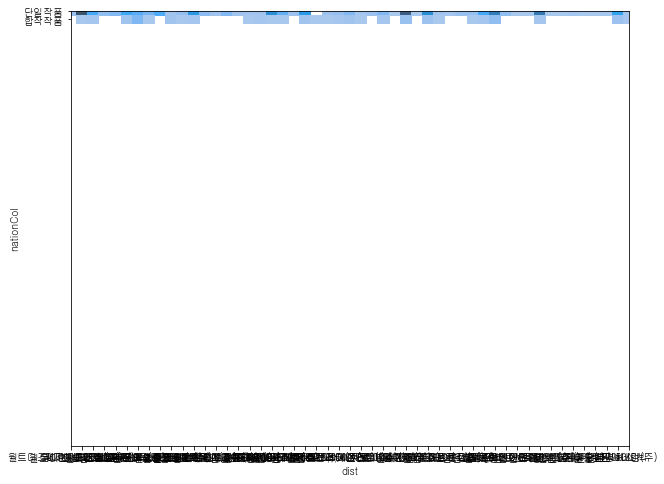

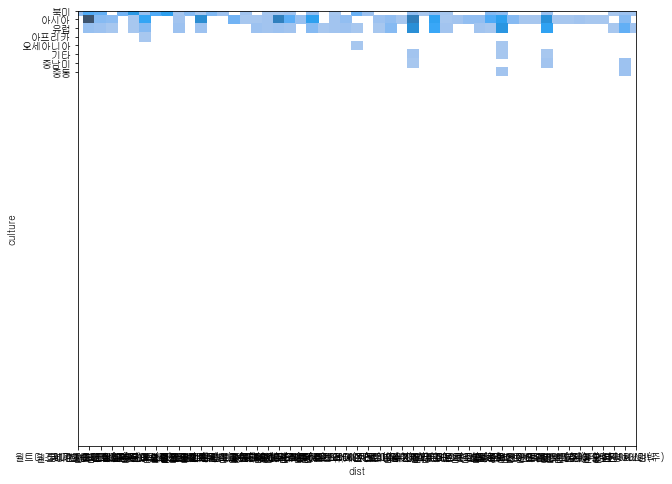

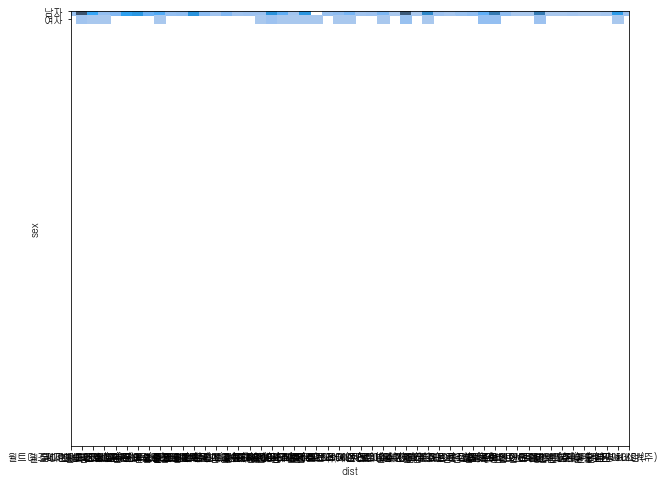

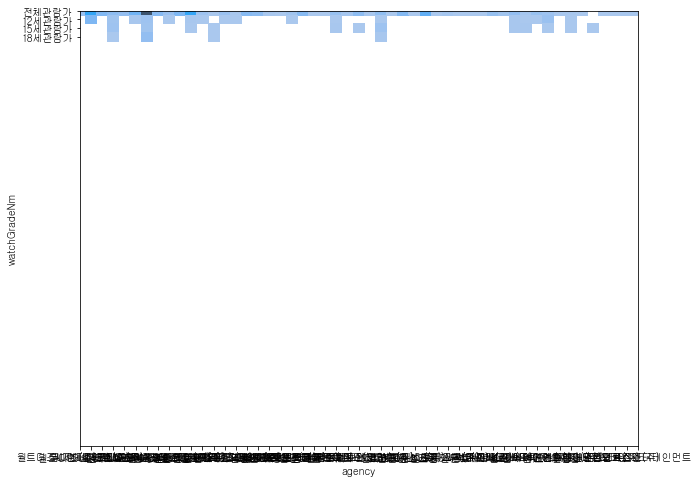

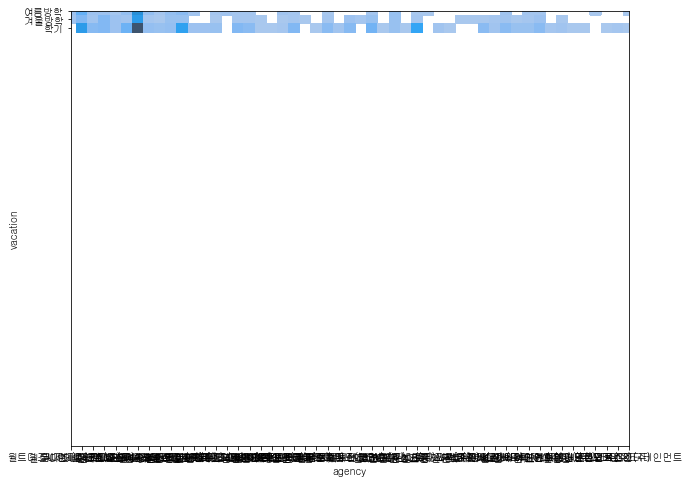

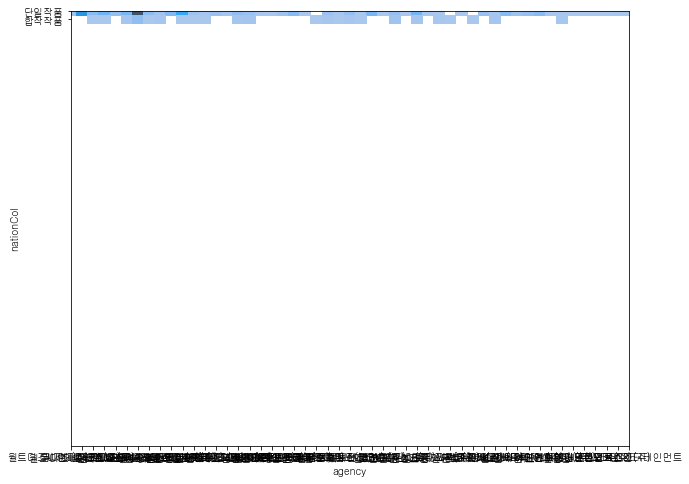

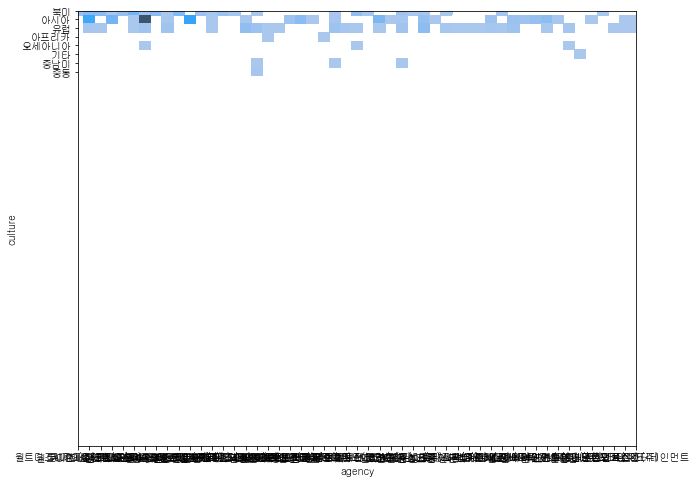

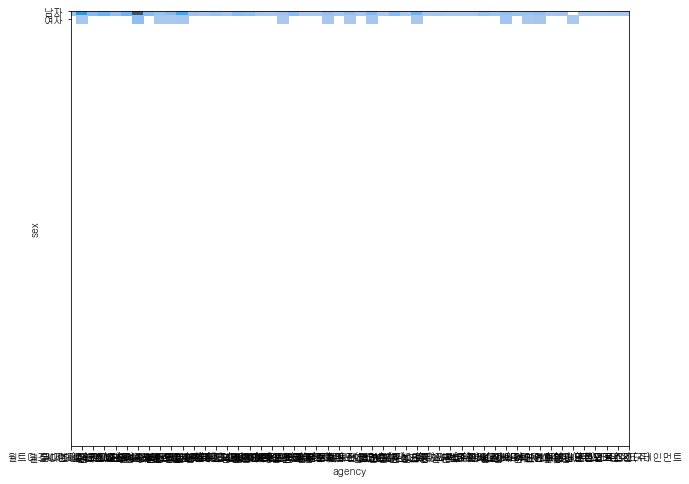

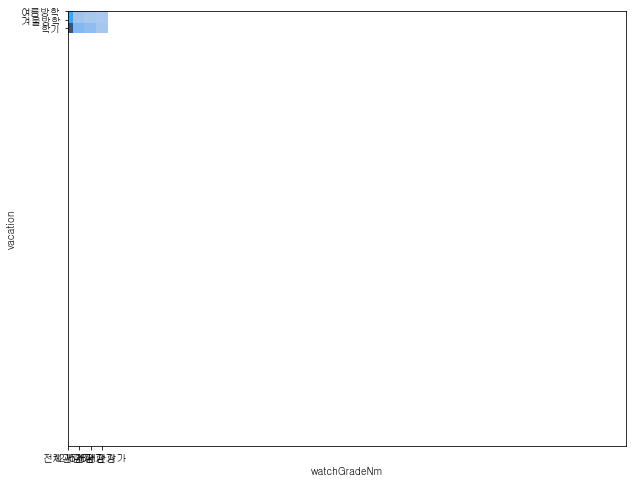

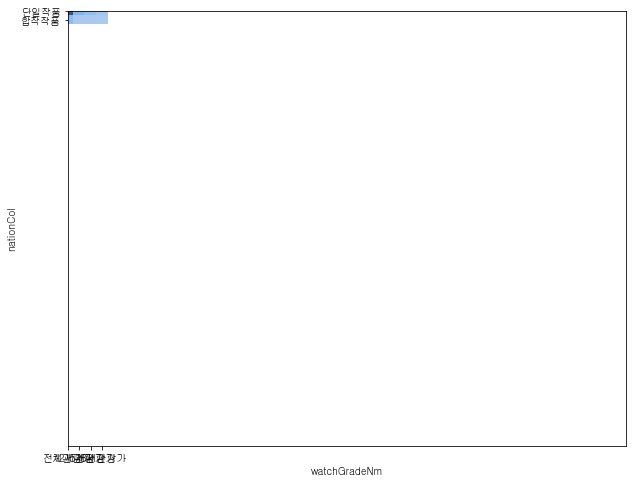

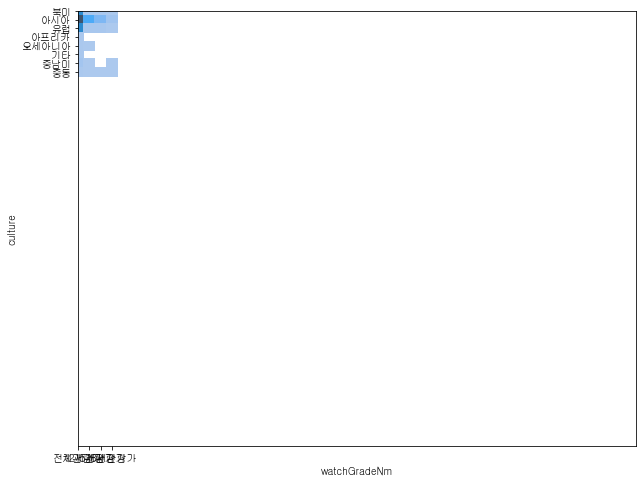

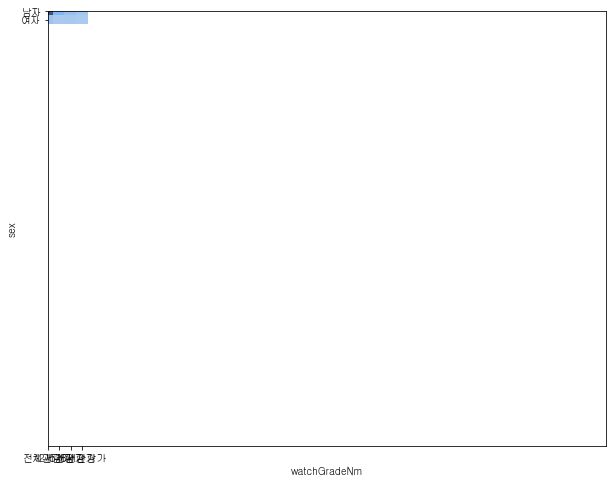

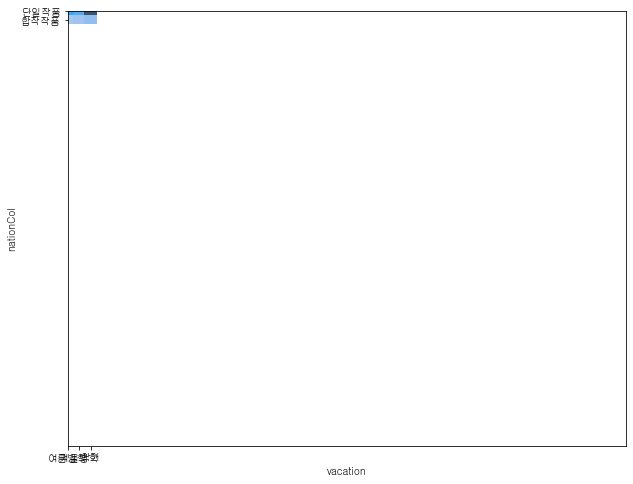

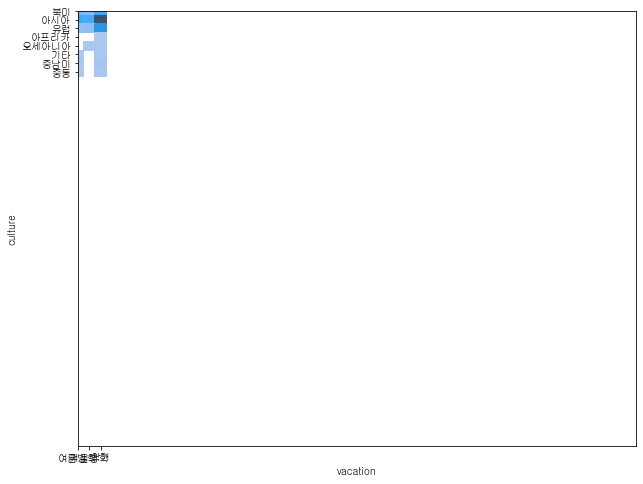

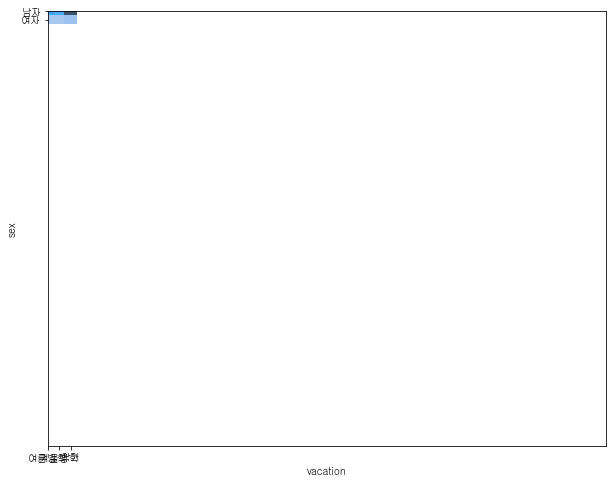

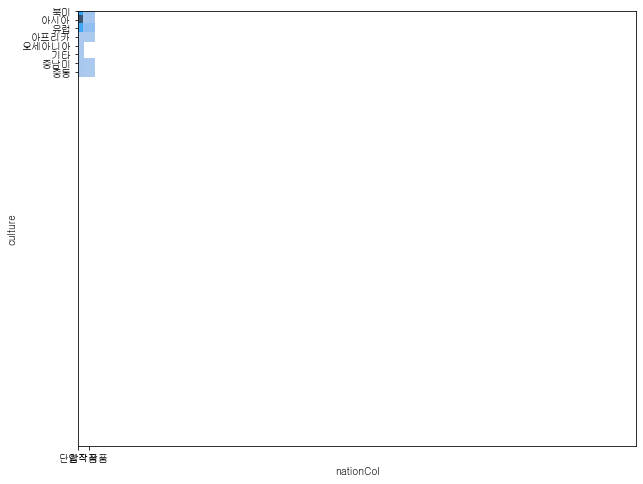

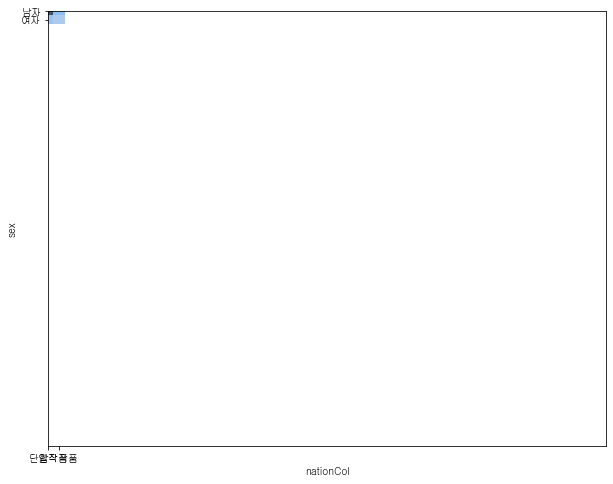

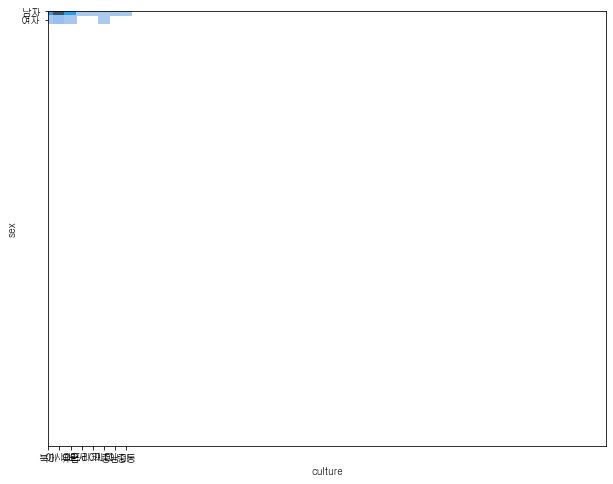

In [102]:
import seaborn as sns

df = pd.read_csv('영화데이터_3.csv')

#각 독립변수와 종속변수 간
plt.scatter(df['prdtYear'],df['totSales'], alpha=0.5)
plt.xlabel('제작년도')
plt.ylabel('매출')
plt.show()
plt.scatter(df['openYr'],df['totSales'], alpha=0.5)
plt.xlabel('개봉년도')
plt.ylabel('매출')
plt.show()
plt.scatter(df['showTm'],df['totSales'], alpha=0.5)
plt.xlabel('상영시간')
plt.ylabel('매출')
plt.show()
plt.scatter(df['actorNum'], df['totSales'], alpha=0.5)
plt.xlabel('성우 수')
plt.ylabel('매출')
plt.show()

sns.boxplot( x="totSales", y='repNationNm', orient='h', data = df)
plt.ylim([50, 0])
plt.show()
sns.boxplot( x="totSales", y='repPeopleNm', orient='h', data = df)
plt.ylim([50, 0])
plt.show()
sns.boxplot(x = "totSales", y = 'dist', orient='h', data = df)
plt.ylim([50, 0])
plt.show()
sns.boxplot(x = "totSales", y = 'agency',  orient='h',  data = df)
plt.ylim([50, 0])
plt.show()
sns.boxplot(x = 'watchGradeNm', y = "totSales", data = df)
plt.show()
sns.boxplot(x = 'sex', y = "totSales", data = df)
plt.show()
sns.boxplot(x = 'vacation', y = "totSales", data = df)
plt.show()
sns.boxplot(x = 'nationCol', y = "totSales", data = df)
plt.show()
sns.boxplot(x = 'culture', y = "totSales", data = df)
plt.show()

# 독립변수들 간 관계
# 숫자형 문자열은 heatmap, pairplot으로 처리
df_subset = df[['prdtYear', 'showTm', 'actorNum', 'openYr']]
sns.pairplot(df_subset)
plt.show()
plt.figure(figsize=(30,30))
sns.heatmap(data=df_subset.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

sns.histplot(x=df['repNationNm'], y=df['repPeopleNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show() #의미가 있나?
sns.histplot(x=df['repNationNm'], y=df['typeNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repNationNm'], y=df['dist'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repNationNm'], y=df['agency'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repNationNm'], y=df['watchGradeNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repNationNm'], y=df['vacation'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repNationNm'], y=df['nationCol'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repNationNm'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repNationNm'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['repPeopleNm'], y=df['typeNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repPeopleNm'], y=df['dist'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repPeopleNm'], y=df['agency'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repPeopleNm'], y=df['watchGradeNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repPeopleNm'], y=df['vacation'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repPeopleNm'], y=df['nationCol'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repPeopleNm'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['repPeopleNm'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['typeNm'], y=df['dist'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['typeNm'], y=df['agency'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['typeNm'], y=df['watchGradeNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['typeNm'], y=df['vacation'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['typeNm'], y=df['nationCol'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['typeNm'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['typeNm'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['dist'], y=df['agency'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['dist'], y=df['watchGradeNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['dist'], y=df['vacation'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['dist'], y=df['nationCol'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['dist'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['dist'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['agency'], y=df['watchGradeNm'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['agency'], y=df['vacation'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['agency'], y=df['nationCol'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['agency'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['agency'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['watchGradeNm'], y=df['vacation'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['watchGradeNm'], y=df['nationCol'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['watchGradeNm'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['watchGradeNm'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['vacation'], y=df[ 'nationCol'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['vacation'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['vacation'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['nationCol'], y=df['culture'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()
sns.histplot(x=df['nationCol'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

sns.histplot(x=df['culture'], y=df['sex'])
plt.ylim([50, 0])
plt.xlim([0, 50])
plt.show()

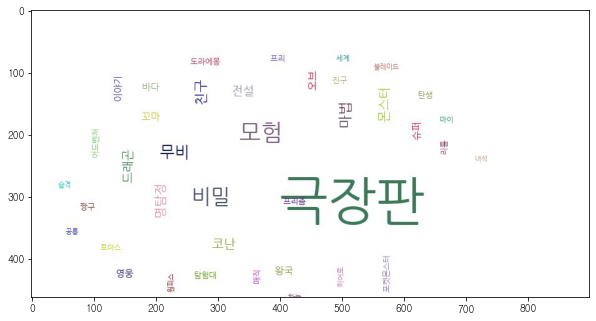

<ipython-input-105-33ed37c33cd5>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top100['movieNm'] = top100['movieNm'].apply(lambda x: text_cleaning(x))


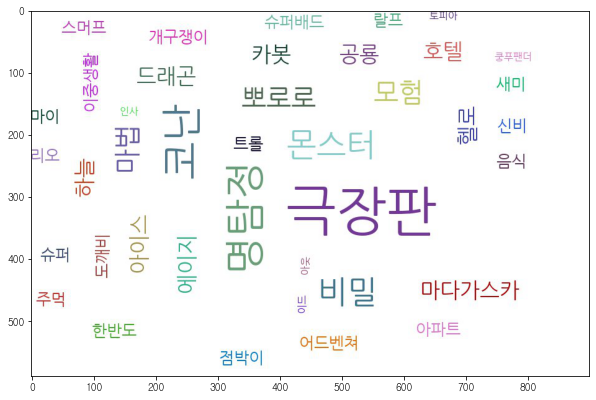

In [105]:
import re
from konlpy.tag import Okt
from collections import Counter
import pytagcloud
import matplotlib.image as img


#전체 텍스트 마이닝
df = pd.read_csv('영화데이터_3.csv')

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+')
    result = hangul.sub('',str(text))
    return result

df['movieNm'] = df['movieNm'].apply(lambda x: text_cleaning(x))
movieNm_corpus = "".join(df['movieNm'].tolist())

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(movieNm_corpus)
count = Counter(nouns)
remove_char_counter = Counter({ x : count[x] for x in count if len(x) > 1 })
korean_stopwords_path= 'korean_stopwords.txt'
with open(korean_stopwords_path, encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags,maxsize=80)
filename = "movieNm_wordcloud.jpg"
pytagcloud.create_tag_image(taglist,filename,size=(900,600),fontname="NanumGothic",rectangular=False)
image = img.imread(filename)
plt.imshow(image)
plt.show()

# 상위 100개 텍스트 마이닝
totSales_order = df.sort_values(['totSales'],ascending=False,ignore_index=True)
top100 = totSales_order.head(100)

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+')
    result = hangul.sub('',str(text))
    return result

top100['movieNm'] = top100['movieNm'].apply(lambda x: text_cleaning(x))
movieNm_corpus = "".join(top100['movieNm'].tolist())

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(movieNm_corpus)
count = Counter(nouns)
remove_char_counter = Counter({ x : count[x] for x in count if len(x) > 1 })
korean_stopwords_path= 'korean_stopwords.txt'
with open(korean_stopwords_path, encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags,maxsize=80)
filename = "movieNm_top100_wordcloud.jpg"
pytagcloud.create_tag_image(taglist,filename,size=(900,600),fontname="NanumGothic",rectangular=False)
image = img.imread(filename)
plt.imshow(image)
plt.show()

     prdtYear repNationNm repPeopleNm  showTm  actorNum                 dist  \
0        2014          미국       피트 닥터     101         5       월트디즈니컴퍼니코리아(주)   
1        2015          미국     바이론 하워드     108         3       월트디즈니컴퍼니코리아(주)   
2        2015          미국         여인영      94         8            씨제이이앤엠(주)   
3        2008          미국      마크 오스본      92         6               CJ ENM   
4        2016          일본     신카이 마코토     106         8        메가박스중앙(주)플러스엠   
..        ...         ...         ...     ...       ...                  ...   
992      2005          한국         유진희      72         3            영화사청어람(주)   
993      2006          한국         유진희      45         3            서울애니메이션센터   
994      2007          일본     신카이 마코토      62         1          대원디지털엔터테인먼트   
995      1999          일본    유야마 쿠니히코      95         3                 알수없음   
996      2006          미국    스티브 오데커크      89         2  유니버설픽쳐스인터내셔널 코리아(유)   

                  agency watchGradeNm s

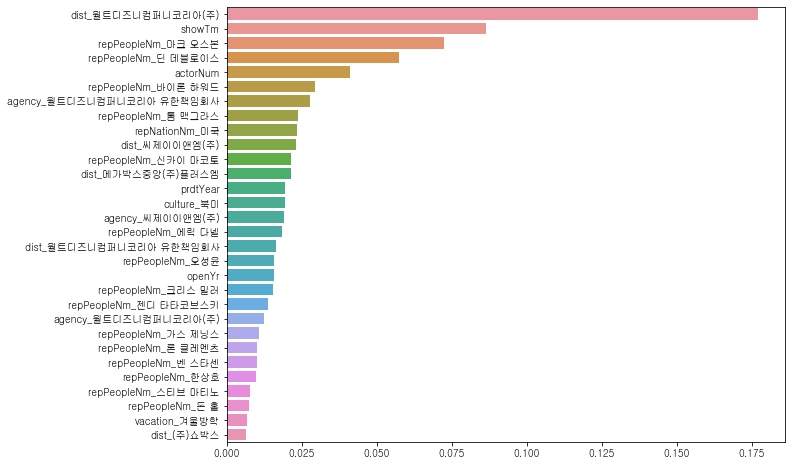

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from skimage.metrics import mean_squared_error

df = pd.read_csv('영화데이터_3.csv', index_col=0)
del df['movieNm']
del df['movieCd']
del df['openDt']
del df['maker']
del df['nationAlt']
del df['typeNm']
del df['repGenreNm']
print(df)

df = pd.get_dummies(df)

target = df['totSales']
del df['totSales']

X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.3, random_state=2102)
print(X_train.shape, X_test.shape)

# 선형회귀
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_pred = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(Y_test, linear_pred))
print("선형회귀 정확도: {}".format(linear_rmse))

# 의사결정트리
tree_model = DecisionTreeRegressor(random_state=2102)
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(Y_test, tree_pred))
print("의사결정트리 정확도: {}".format(tree_rmse))

# 랜덤포레스트
rf_model = RandomForestRegressor(random_state=2102)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_pred))
print("랜덤포레스트 정확도: {}".format(rf_rmse))

# 랜덤 포레스트 상위 30개 결과 시각화
feature_series = pd.Series(data=rf_model.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series.head(30), y = feature_series.head(30).index)
plt.show()